# Data Preparation

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
# To overwrite the look of matplotlib with seaborn
sns.set()

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Import Data

In [2]:
loan_data = pd.read_csv(r'C:\Users\WIN8\Desktop\PGDS 2020\Datasets\Credit Risk Analysis\Lending Club Data Kaggle\loan_data_2007_2014.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Creating a copy of the loan data
loan_data_copy = loan_data.copy()

### Exploring Data

In [4]:
loan_data.shape

(466285, 75)

In [5]:
# To show all columns & rows
pd.options.display.max_columns = None

loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

### General Preprocessing

#### Preprocessing few continuous variables

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We need to remove 'years', '+', '>' and other text from this variable. We only need the numerical part of the data.

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(str(0))

In [10]:
loan_data['emp_length_int'].dtype

dtype('O')

In [11]:
#Converting to numerical
loan_data['emp_length_int'] = loan_data['emp_length_int'].astype(float)
loan_data['emp_length_int'].dtype

dtype('float64')

In [12]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
loan_data['term_int'] = loan_data['term'].str.lstrip()
loan_data['term_int'] = loan_data['term_int'].str.replace(' months', '')
loan_data['term_int'].unique()

array(['36', '60'], dtype=object)

In [14]:
#Converting to numerical
loan_data['term_int'] = loan_data['term_int'].astype(float)
loan_data['term_int'].dtype

dtype('float64')

In [15]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

We see that earliest_cr_line and issue_d are in text format. We need to convert them to months from the current date.

In [16]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
loan_data['months_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M'))

In [19]:
loan_data['months_since_earliest_cr_line']

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: months_since_earliest_cr_line, Length: 466285, dtype: float64

In [20]:
loan_data['months_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: months_since_earliest_cr_line, dtype: float64

We observe that some data points have negative values for months since earliest credit line. This may have happened when we converted the data points to the datetime format. Let us check what these data points are.

In [21]:
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'months_since_earliest_cr_line']][loan_data['months_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,months_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


The negative data points refer to periods before 1960. We can preprocess these data points correctly. But that will be very time consuming. These data points confer to just 0.25% of our data. Alternatively, we can fix the months_since_earliest_cr_line value to the maximum value, as it would be closest to these points.

In [22]:
loan_data['months_since_earliest_cr_line'][loan_data['months_since_earliest_cr_line'] < 0] = loan_data['months_since_earliest_cr_line'].max()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
min(loan_data['months_since_earliest_cr_line'])

73.0

In [24]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [25]:
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
type(loan_data['issue_d_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
loan_data['months_issue_d_date'] = round((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/np.timedelta64(1, 'M'))
loan_data['months_issue_d_date']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
          ... 
466280    47.0
466281    47.0
466282    47.0
466283    47.0
466284    47.0
Name: months_issue_d_date, Length: 466285, dtype: float64

In [27]:
loan_data['months_issue_d_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_issue_d_date, dtype: float64

#### Preprocessing Discrete Features

In [28]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [29]:
# Creating dummies for the categorical variables

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                    pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                    pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                    pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                    pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                    pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]


loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,months_since_earliest_cr_line,issue_d_date,months_issue_d_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,36.0,1985-01-01,395.0,2011-12-01,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Sourc

### Missing Values Imputation

In [30]:
loan_data.isnull().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                        ..
addr_state:WI            0
addr_state:WV            0
addr_state:WY            0
initial_list_status:f    0
initial_list_status:w    0
Length: 207, dtype: int64

In [31]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [32]:
loan_data['annual_inc'].fillna(np.mean(loan_data['annual_inc']), inplace = True)
loan_data['annual_inc'].isnull().sum()

0

In [33]:
loan_data['delinq_2yrs'].fillna( 0 , inplace = True)
loan_data['inq_last_6mths'].fillna( 0 , inplace = True)
loan_data['open_acc'].fillna( 0 , inplace = True)
loan_data['pub_rec'].fillna( 0 , inplace = True)
loan_data['total_acc'].fillna( 0 , inplace = True)
loan_data['acc_now_delinq'].fillna( 0 , inplace = True)
loan_data['emp_length_int'].fillna( 0 , inplace = True)
loan_data['months_since_earliest_cr_line'].fillna( 0 , inplace = True)

## PD Model

### Data Preparation

### Dependent Variable

In [34]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [35]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [36]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [37]:
# Creating a binary variable for loan status
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off ', 'Late (31-120 days)',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)', 'Default']), 0, 1)

In [38]:
loan_data['good_bad'].head()

0    1
1    1
2    1
3    1
4    1
Name: good_bad, dtype: int32

In [39]:
loan_data['good_bad'].value_counts() / loan_data['good_bad'].count()

1    0.981786
0    0.018214
Name: good_bad, dtype: float64

We observe that 98.18% of our data contains good loans and a mere 1.82% of bad loans. Due to such a high imbalance in the dataset, we will choose to split the whole dataset to 80% training, 20% test, with stratify, resulting in consistent class distribution between training and test sets.

### Splitting the Dataset

In [40]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), 
                                                                                                                  loan_data['good_bad'], test_size = 0.2,
                                                                                                                 stratify = loan_data['good_bad'],
                                                                                                                  random_state = 40)


We further split the train data into train and validation data as 80:20 split.

In [41]:
loan_data_inputs_train, loan_data_inputs_validation, loan_data_targets_train, loan_data_targets_validation = train_test_split(loan_data_inputs_train,
                                                                                                                        loan_data_targets_train, test_size = 0.2,
                                                                                                                              stratify = loan_data_targets_train,
                                                                                                                              random_state = 30)

In [42]:
print("We verify that the proportion of Charged Off is about the same: {0:.2%} in train, {1:.2%} in val and {2:.2%} in test".format(len(loan_data_targets_train[loan_data_targets_train==0])/len(loan_data_targets_train),
                                                                                                                                   len(loan_data_targets_validation[loan_data_targets_validation==0])/len(loan_data_targets_validation),
                                                                                                                                   len(loan_data_targets_test[loan_data_targets_test==0])/len(loan_data_targets_test)))

We verify that the proportion of Charged Off is about the same: 1.82% in train, 1.82% in val and 1.82% in test


In [43]:
loan_data_inputs_train.shape

(298422, 207)

In [44]:
loan_data_inputs_validation.shape

(74606, 207)

In [45]:
loan_data_inputs_test.shape

(93257, 207)

In [46]:
loan_data_targets_train.shape

(298422,)

In [47]:
loan_data_targets_validation.shape

(74606,)

In [48]:
loan_data_targets_test.shape

(93257,)

## Manual Preprocessing Discrete Variables

We want to access its explanatory power in relation to default.

In [371]:
#df_inputs_prepr = loan_data_inputs_train.copy()
#df_targets_prepr = loan_data_targets_train.copy()
#df_inputs_prepr = loan_data_inputs_validation.copy()
#df_targets_prepr = loan_data_targets_validation.copy()
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [372]:
df_inputs_prepr_final = pd.DataFrame()

In [373]:
df_inputs_prepr['grade'].unique()

array(['B', 'E', 'A', 'D', 'C', 'F', 'G'], dtype=object)

In [374]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
168117,B,1
41650,E,1
197654,E,1
23389,A,1
159468,B,1


In [375]:

df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15048
1,B,27368
2,C,24916
3,D,15513
4,E,7062
5,F,2642
6,G,708


In [376]:
# Calculating the proportion of good borrowers
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.994883
1,B,0.988161
2,C,0.981016
3,D,0.971830
4,E,0.963891
5,F,0.962150
6,G,0.953390


In [377]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

df1

,grade,good_bad,grade,good_bad
0,A,15048,A,0.994883
1,B,27368,B,0.988161
2,C,24916,C,0.981016
3,D,15513,D,0.971830
4,E,7062,E,0.963891
5,F,2642,F,0.962150
6,G,708,G,0.953390


In [378]:
df1 = df1.iloc[:, [0,1,3]]
df1

,grade,good_bad,good_bad
0,A,15048,0.994883
1,B,27368,0.988161
2,C,24916,0.981016
3,D,15513,0.971830
4,E,7062,0.963891
5,F,2642,0.962150
6,G,708,0.953390


In [379]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,15048,0.994883
1,B,27368,0.988161
2,C,24916,0.981016
3,D,15513,0.971830
4,E,7062,0.963891
5,F,2642,0.962150
6,G,708,0.953390


In [380]:

df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1.head()

,grade,n_obs,prop_good,prop_n_obs
0,A,15048,0.994883,0.161361
1,B,27368,0.988161,0.293469
2,C,24916,0.981016,0.267176
3,D,15513,0.971830,0.166347
4,E,7062,0.963891,0.075726


In [381]:
# Storing number of good and bad borrowers as per grade
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15048,0.994883,0.161361,14971.0,77.0
1,B,27368,0.988161,0.293469,27044.0,324.0
2,C,24916,0.981016,0.267176,24443.0,473.0
3,D,15513,0.971830,0.166347,15076.0,437.0
4,E,7062,0.963891,0.075726,6807.0,255.0
5,F,2642,0.962150,0.028330,2542.0,100.0
6,G,708,0.953390,0.007592,675.0,33.0


In [382]:
# Calculating the proportion of good and bad borrowers for each grade
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15048,0.994883,0.161361,14971.0,77.0,0.163514,0.045321
1,B,27368,0.988161,0.293469,27044.0,324.0,0.295376,0.190700
2,C,24916,0.981016,0.267176,24443.0,473.0,0.266967,0.278399
3,D,15513,0.971830,0.166347,15076.0,437.0,0.164661,0.257210
4,E,7062,0.963891,0.075726,6807.0,255.0,0.074346,0.150088
5,F,2642,0.962150,0.028330,2542.0,100.0,0.027764,0.058858
6,G,708,0.953390,0.007592,675.0,33.0,0.007372,0.019423


In [383]:
# Calculating Weight of Evidence
df1['WOE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE
0,A,15048,0.994883,0.161361,14971.0,77.0,0.163514,0.045321,1.283132
1,B,27368,0.988161,0.293469,27044.0,324.0,0.295376,0.190700,0.437544
2,C,24916,0.981016,0.267176,24443.0,473.0,0.266967,0.278399,-0.041929
3,D,15513,0.971830,0.166347,15076.0,437.0,0.164661,0.257210,-0.446007
4,E,7062,0.963891,0.075726,6807.0,255.0,0.074346,0.150088,-0.702490
5,F,2642,0.962150,0.028330,2542.0,100.0,0.027764,0.058858,-0.751397
6,G,708,0.953390,0.007592,675.0,33.0,0.007372,0.019423,-0.968728


In [384]:
# Sorting in order of default descending
df1 = df1.sort_values(['WOE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE
0,G,708,0.953390,0.007592,675.0,33.0,0.007372,0.019423,-0.968728
1,F,2642,0.962150,0.028330,2542.0,100.0,0.027764,0.058858,-0.751397
2,E,7062,0.963891,0.075726,6807.0,255.0,0.074346,0.150088,-0.702490
3,D,15513,0.971830,0.166347,15076.0,437.0,0.164661,0.257210,-0.446007
4,C,24916,0.981016,0.267176,24443.0,473.0,0.266967,0.278399,-0.041929
5,B,27368,0.988161,0.293469,27044.0,324.0,0.295376,0.190700,0.437544
6,A,15048,0.994883,0.161361,14971.0,77.0,0.163514,0.045321,1.283132


In [385]:
# Calculating absolute change between classes
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WOE'] = df1['WOE'].diff().abs()

# Calculating Information Value
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WOE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G,708,0.953390,0.007592,675.0,33.0,0.007372,0.019423,-0.968728,NaN,NaN,0.32746
1,F,2642,0.962150,0.028330,2542.0,100.0,0.027764,0.058858,-0.751397,0.008760,0.217331,0.32746
2,E,7062,0.963891,0.075726,6807.0,255.0,0.074346,0.150088,-0.702490,0.001741,0.048907,0.32746
3,D,15513,0.971830,0.166347,15076.0,437.0,0.164661,0.257210,-0.446007,0.007939,0.256483,0.32746
4,C,24916,0.981016,0.267176,24443.0,473.0,0.266967,0.278399,-0.041929,0.009186,0.404078,0.32746
5,B,27368,0.988161,0.293469,27044.0,324.0,0.295376,0.190700,0.437544,0.007145,0.479473,0.32746
6,A,15048,0.994883,0.161361,14971.0,77.0,0.163514,0.045321,1.283132,0.006722,0.845588,0.32746


## Automating Preprocessing Discrete Variables

In [386]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # Subsetting the rows
    df = df.iloc[:, [0,1,3]]
    # Renaming the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Calculating proportion of good obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculating number of good obs
    df['n_good'] = df['prop_good'] * df['n_obs']
    # Calculating number of bad obs
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [387]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G,708,0.953390,0.007592,675.0,33.0,0.007372,0.019423,-0.968728,NaN,NaN,0.32746
1,F,2642,0.962150,0.028330,2542.0,100.0,0.027764,0.058858,-0.751397,0.008760,0.217331,0.32746
2,E,7062,0.963891,0.075726,6807.0,255.0,0.074346,0.150088,-0.702490,0.001741,0.048907,0.32746
3,D,15513,0.971830,0.166347,15076.0,437.0,0.164661,0.257210,-0.446007,0.007939,0.256483,0.32746
4,C,24916,0.981016,0.267176,24443.0,473.0,0.266967,0.278399,-0.041929,0.009186,0.404078,0.32746
5,B,27368,0.988161,0.293469,27044.0,324.0,0.295376,0.190700,0.437544,0.007145,0.479473,0.32746
6,A,15048,0.994883,0.161361,14971.0,77.0,0.163514,0.045321,1.283132,0.006722,0.845588,0.32746


### Visualizing Results

In [388]:
def plot_by_woe(df_WOE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WOE.iloc[:, 0])
    y = df_WOE['WOE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WOE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WOE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

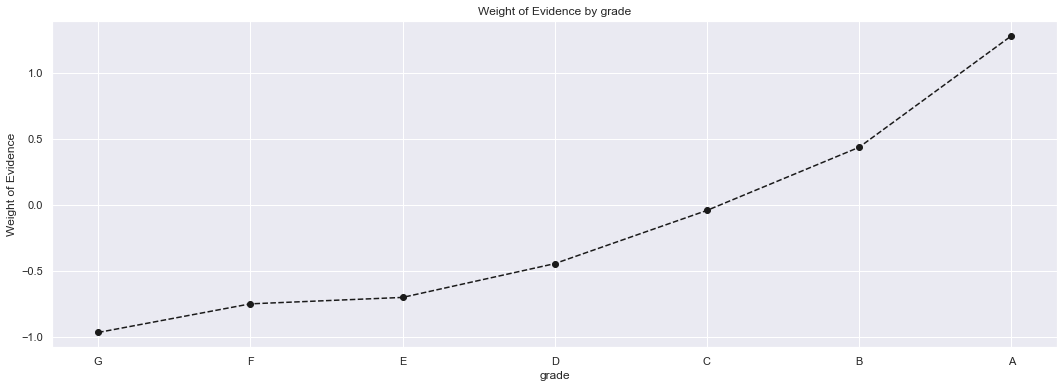

In [389]:
plot_by_woe(df_temp)

### Creating Dummy Variables for Discrete Variables

In [390]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,OTHER,32,0.968750,0.000343,31.0,1.0,0.000339,0.000589,-0.552946,NaN,NaN,inf
1,RENT,37407,0.979763,0.401117,36650.0,757.0,0.400293,0.445556,-0.107127,0.011013,0.445818,inf
2,OWN,8362,0.979909,0.089666,8194.0,168.0,0.089495,0.098882,-0.099739,0.000146,0.007388,inf
3,MORTGAGE,47450,0.983709,0.508809,46677.0,773.0,0.509808,0.454974,0.113795,0.003800,0.213534,inf
4,NONE,6,1.000000,0.000064,6.0,0.0,0.000066,0.000000,inf,0.016291,inf,inf


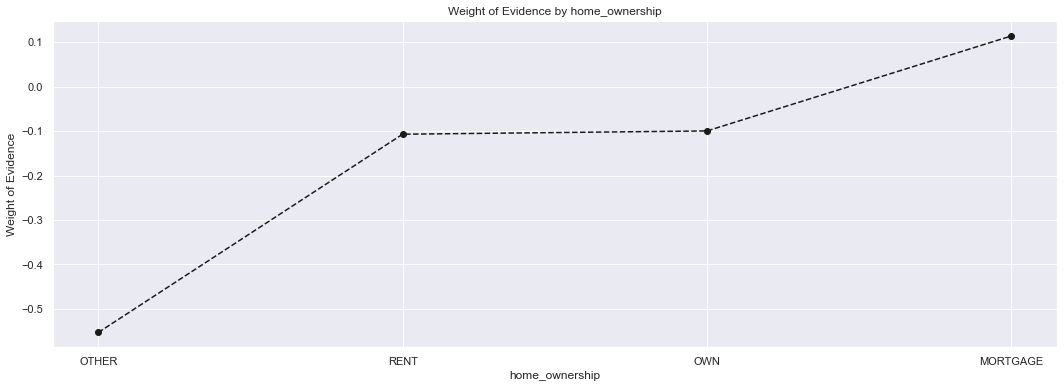

In [391]:
plot_by_woe(df_temp)

The categories Other and None are associated with a very low weight of evidence. Also we see that 'ANY' should be an error as it just has one record. We can remove these observations, but we dont want to lose on these data points. Hence, we combine Other, None & Any category with the next most riskiest category 'RENT'.

In [392]:
df_inputs_prepr_final['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                             df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'],
                                                             df_inputs_prepr['home_ownership:ANY']])

df_inputs_prepr_final['home_ownership:MORTGAGE'] = df_inputs_prepr['home_ownership:MORTGAGE']

In [393]:
# State of the borrower
df_inputs_prepr['addr_state'].unique()

array(['MI', 'CT', 'SD', 'NC', 'MN', 'CA', 'PA', 'MD', 'RI', 'KY', 'IN',
       'IL', 'NM', 'TX', 'NY', 'NJ', 'OH', 'MO', 'GA', 'CO', 'FL', 'MA',
       'AL', 'NV', 'LA', 'SC', 'DE', 'AZ', 'TN', 'WA', 'AR', 'OR', 'AK',
       'VA', 'WI', 'OK', 'KS', 'VT', 'NH', 'UT', 'DC', 'WY', 'MS', 'MT',
       'HI', 'WV', 'ID', 'NE', 'IA'], dtype=object)

In [394]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,NE,3,0.333333,0.000032,1.0,2.0,0.000011,0.001177,-4.680080,NaN,NaN,inf
1,MS,238,0.970588,0.002552,231.0,7.0,0.002523,0.004120,-0.490425,0.637255,4.189655e+00,inf
2,TN,1179,0.971162,0.012642,1145.0,34.0,0.012506,0.020012,-0.470133,0.000574,2.029183e-02,inf
3,LA,1074,0.974860,0.011517,1047.0,27.0,0.011435,0.015892,-0.329085,0.003698,1.410480e-01,inf
4,MO,1565,0.975080,0.016782,1526.0,39.0,0.016667,0.022955,-0.320089,0.000220,8.996221e-03,inf
5,UT,712,0.976124,0.007635,695.0,17.0,0.007591,0.010006,-0.276234,0.001044,4.385494e-02,inf
6,WV,483,0.977226,0.005179,472.0,11.0,0.005155,0.006474,-0.227849,0.001102,4.838521e-02,inf
7,NM,537,0.977654,0.005758,525.0,12.0,0.005734,0.007063,-0.208441,0.000428,1.940790e-02,inf
8,MD,2246,0.978629,0.024084,2198.0,48.0,0.024007,0.028252,-0.162831,0.000975,4.561051e-02,inf
9,NC,2531,0.978665,0.027140,2477.0,54.0,0.027054,0.031783,-0.161113,0.000036,1.717259e-03,inf


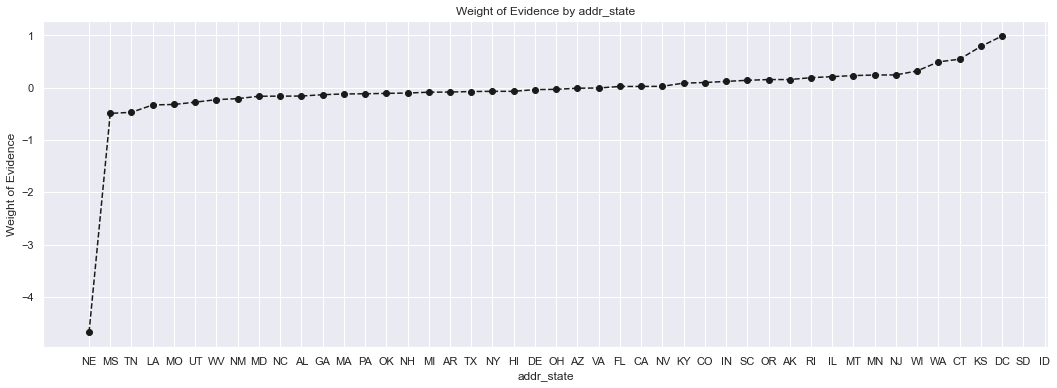

In [395]:
plot_by_woe(df_temp)

We see that there is no record for North Dakota. We might have customers from that state in future. Hence, we add a dummy variable with the values as 0.

In [396]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0  

We see that the states Nebraska and Iowa with a considerable lower weight of evidence than most states.
Also Maine and Idaho have a very high weight of evidence. The weight of evidence for these states could not be calculated as there were no bad borrowers in our data from these states.
Let us plot a woe chart without these to understand the others better.

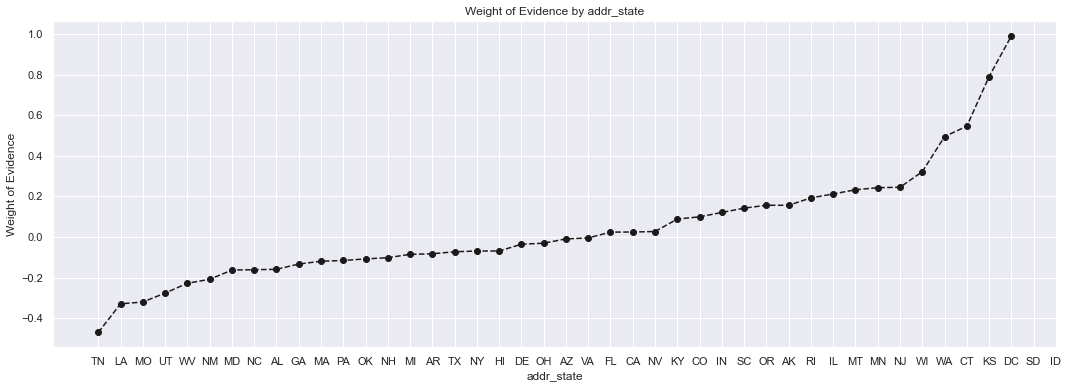

In [397]:
plot_by_woe(df_temp.iloc[2:-2, :])

We see a different perspective. As Nebraska & Iowa were so far away from the other observations, that the initial chart showed that all states have more or less similar weight of evidence. We now see that the first state MT has the lowest weight of evidence. The second, third and fourth states have considerably lower weight of evidence than the following states.

It makes sense to put MT as a separate category and SD, OK, MS as a separate category. However we see that MT does has a only 1125 borrowers. So we combine all these states with reference to OK with 3255 obervations. Further we will also add the NE & IA from the previous chart. 

We also include North Dakota (ND) here as we had no information about it. Since the category in question denotes highest risk category, we include ND here. This follows the conservation principle, that when we have no information, we assume the 'Worst' or highest risk category.

Similarly we combine AK, DC, KS, WY, ID & ME into one category with reference as KS with 3341 observations.

Let us now take a look at the remaining 38 states.

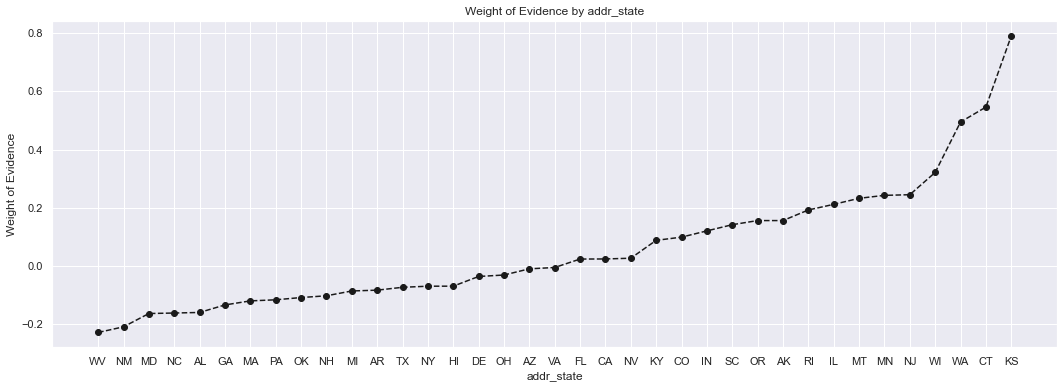

In [398]:
plot_by_woe(df_temp.iloc[6:-6,:])

We will further combine other states based on their similarity of weight of evidence and giving due consideration to the number of observations under each category.

In [399]:
df_inputs_prepr_final['addr_state:AK_DC_KS_WY_ID_ME'] = sum([df_inputs_prepr['addr_state:AK'],
                                                       df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:KS'],
                                                       df_inputs_prepr['addr_state:WY'],
                                                       df_inputs_prepr['addr_state:ID'],
                                                       df_inputs_prepr['addr_state:ME']])

df_inputs_prepr_final['addr_state:SD_OK_MS_MT_NE_IA_ND'] = sum([df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:OK'],
                                                       df_inputs_prepr['addr_state:MS'],
                                                       df_inputs_prepr['addr_state:MT'],
                                                       df_inputs_prepr['addr_state:NE'],
                                                       df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:ND']])

df_inputs_prepr_final['addr_state:TN_HI_NV'] = sum([df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:HI'],
                                              df_inputs_prepr['addr_state:NV']])

df_inputs_prepr_final['addr_state:AZ_RI_NY'] = sum([df_inputs_prepr['addr_state:AZ'],
                                              df_inputs_prepr['addr_state:RI'],
                                              df_inputs_prepr['addr_state:NY']])

df_inputs_prepr_final['addr_state:VA_LA'] = sum([df_inputs_prepr['addr_state:VA'],
                                           df_inputs_prepr['addr_state:LA']])

df_inputs_prepr_final['addr_state:MD_AL_IN_MO'] = sum([df_inputs_prepr['addr_state:MD'],
                                                 df_inputs_prepr['addr_state:AL'],
                                                 df_inputs_prepr['addr_state:IN'],
                                                 df_inputs_prepr['addr_state:MO']])

df_inputs_prepr_final['addr_state:MA_AR'] = sum([df_inputs_prepr['addr_state:MA'],
                                           df_inputs_prepr['addr_state:AR']])

df_inputs_prepr_final['addr_state:MI_DE_WI'] = sum([df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:DE'],
                                              df_inputs_prepr['addr_state:WI']])

df_inputs_prepr_final['addr_state:NC_NM'] = sum([df_inputs_prepr['addr_state:NC'],
                                           df_inputs_prepr['addr_state:NM']])

df_inputs_prepr_final['addr_state:CO_MN_NH_KY_VT'] = sum([df_inputs_prepr['addr_state:CO'],
                                                    df_inputs_prepr['addr_state:MN'],
                                                    df_inputs_prepr['addr_state:NH'],
                                                    df_inputs_prepr['addr_state:KY'],
                                                    df_inputs_prepr['addr_state:VT']])



df_inputs_prepr_final['addr_state:SC_WV_UT'] = sum([df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:WV'],
                                              df_inputs_prepr['addr_state:UT']])


In [400]:
#Verification Status
df_inputs_prepr['verification_status'].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [401]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,Source Verified,30150,0.979735,0.323300,29539.0,611.0,0.322626,0.359623,-0.108563,NaN,NaN,0.008757
1,Verified,33652,0.981754,0.360852,33038.0,614.0,0.360842,0.361389,-0.001514,0.002020,0.107049,0.008757
2,Not Verified,29455,0.983908,0.315848,28981.0,474.0,0.316532,0.278988,0.126256,0.002153,0.127770,0.008757


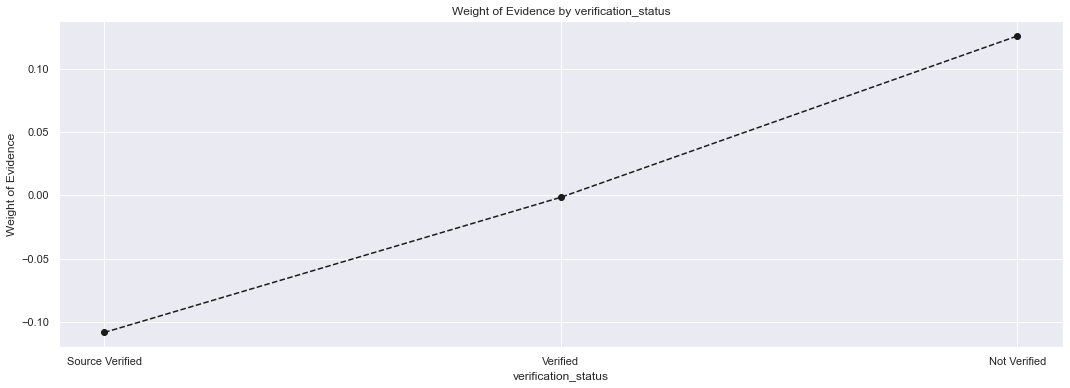

In [402]:
plot_by_woe(df_temp)

In [403]:
#Purpose
df_inputs_prepr['purpose'].unique()

array(['debt_consolidation', 'small_business', 'credit_card',
       'major_purchase', 'home_improvement', 'other', 'medical', 'house',
       'car', 'renewable_energy', 'moving', 'vacation', 'wedding',
       'educational'], dtype=object)

In [404]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,educational,72,0.930556,0.000772,67.0,5.0,0.000732,0.002943,-1.391678,NaN,NaN,0.029728
1,renewable_energy,69,0.956522,0.000740,66.0,3.0,0.000721,0.001766,-0.895890,0.025966,0.495788,0.029728
2,small_business,1441,0.969466,0.015452,1397.0,44.0,0.015258,0.025898,-0.529040,0.012944,0.366850,0.029728
3,vacation,485,0.975258,0.005201,473.0,12.0,0.005166,0.007063,-0.312744,0.005792,0.216296,0.029728
4,other,4650,0.976559,0.049862,4541.0,109.0,0.049597,0.064155,-0.257378,0.001301,0.055366,0.029728
5,debt_consolidation,54875,0.980975,0.588428,53831.0,1044.0,0.587944,0.614479,-0.044143,0.004416,0.213235,0.029728
6,major_purchase,1994,0.982447,0.021382,1959.0,35.0,0.021396,0.020600,0.037909,0.001472,0.082051,0.029728
7,moving,589,0.983022,0.006316,579.0,10.0,0.006324,0.005886,0.071785,0.000575,0.033876,0.029728
8,home_improvement,5311,0.983242,0.056950,5222.0,89.0,0.057035,0.052384,0.085067,0.000220,0.013282,0.029728
9,medical,963,0.983385,0.010326,947.0,16.0,0.010343,0.009417,0.093778,0.000143,0.008711,0.029728


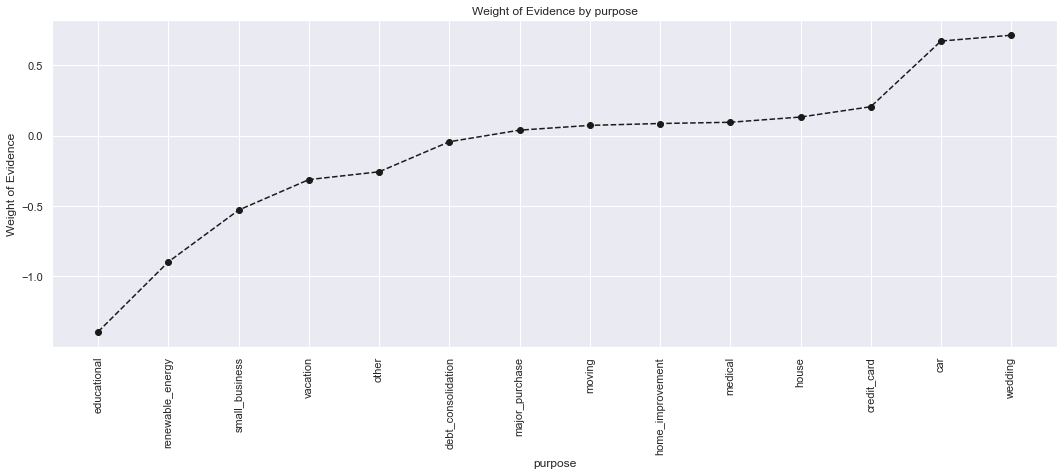

In [405]:
plot_by_woe(df_temp,90)

We see that educational purpose has the lowest weight of evidence, and renewable energy has the highest. But they also have the lowest number of observations among all the categories. Let us plot without these categories.

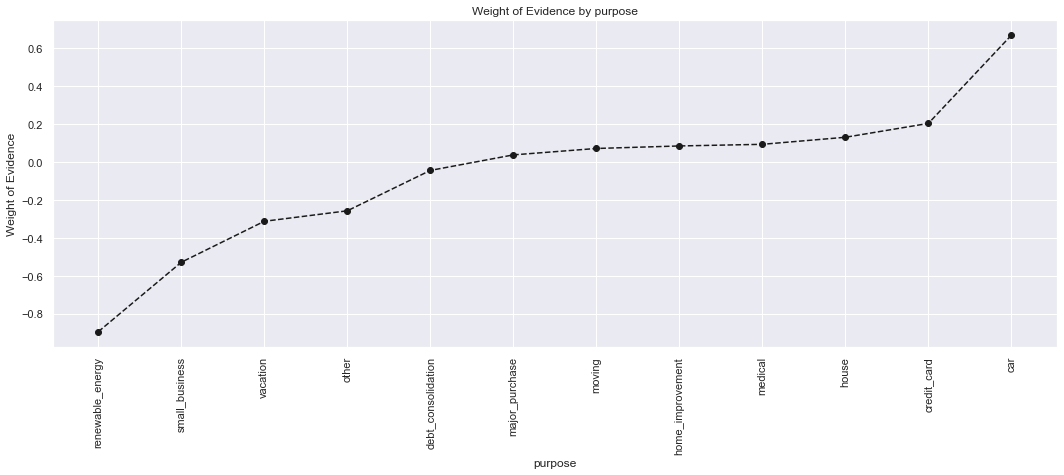

In [406]:
plot_by_woe(df_temp.iloc[1:-1,:],90)

We once again combine the categories based on their similarity of weight of evidence as well their numbers in our dataset.

In [407]:
df_inputs_prepr_final['purpose:house_moving'] = sum([df_inputs_prepr['purpose:house'],
                                               df_inputs_prepr['purpose:moving']])

df_inputs_prepr_final['purpose:other_medical'] = sum([df_inputs_prepr['purpose:other'],
                                                df_inputs_prepr['purpose:medical']])

df_inputs_prepr_final['purpose:vacation_major_purchase'] = sum([df_inputs_prepr['purpose:vacation'],
                                                          df_inputs_prepr['purpose:major_purchase']])

df_inputs_prepr_final['purpose:wedding_renewable_energy'] = sum([df_inputs_prepr['purpose:wedding'],
                                                           df_inputs_prepr['purpose:renewable_energy']])

In [408]:
# Initial List Status
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [409]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,w,32756,0.979424,0.351244,32082.0,674.0,0.350401,0.396704,-0.124113,NaN,NaN,0.009171
1,f,60501,0.983058,0.648756,59476.0,1025.0,0.649599,0.603296,0.073947,0.003635,0.19806,0.009171


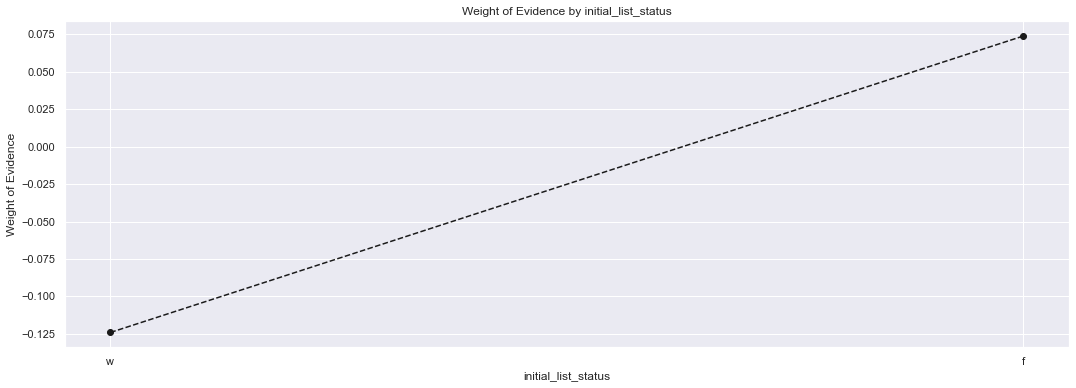

In [410]:
plot_by_woe(df_temp)

In [411]:
# Sub grade
df_inputs_prepr['sub_grade'].unique()

array(['B3', 'E3', 'E2', 'A5', 'B4', 'D1', 'C4', 'C1', 'C2', 'B2', 'C5',
       'C3', 'A4', 'A2', 'B1', 'A1', 'D4', 'A3', 'D2', 'B5', 'E4', 'E5',
       'D3', 'D5', 'E1', 'F1', 'F4', 'F3', 'G4', 'F2', 'G2', 'F5', 'G3',
       'G1', 'G5'], dtype=object)

In [412]:
df_temp = woe_discrete(df_inputs_prepr, 'sub_grade', df_targets_prepr)
df_temp

,sub_grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,G4,87,0.919540,0.000933,80.0,7.0,0.000874,0.004120,-1.550816,NaN,NaN,0.391411
1,G5,88,0.920455,0.000944,81.0,7.0,0.000885,0.004120,-1.538394,0.000914,0.012423,0.391411
2,E2,1758,0.956769,0.018851,1682.0,76.0,0.018371,0.044732,-0.889927,0.036315,0.648466,0.391411
3,F3,537,0.960894,0.005758,516.0,21.0,0.005636,0.012360,-0.785348,0.004125,0.104579,0.391411
4,F1,793,0.960908,0.008503,762.0,31.0,0.008323,0.018246,-0.784973,0.000014,0.000375,0.391411
5,F2,615,0.960976,0.006595,591.0,24.0,0.006455,0.014126,-0.783171,0.000068,0.001803,0.391411
6,G3,129,0.961240,0.001383,124.0,5.0,0.001354,0.002943,-0.776089,0.000265,0.007081,0.391411
7,E4,1189,0.961312,0.012750,1143.0,46.0,0.012484,0.027075,-0.774163,0.000072,0.001927,0.391411
8,F5,291,0.962199,0.003120,280.0,11.0,0.003058,0.006474,-0.750038,0.000887,0.024124,0.391411
9,G2,168,0.964286,0.001801,162.0,6.0,0.001769,0.003531,-0.691096,0.002086,0.058943,0.391411


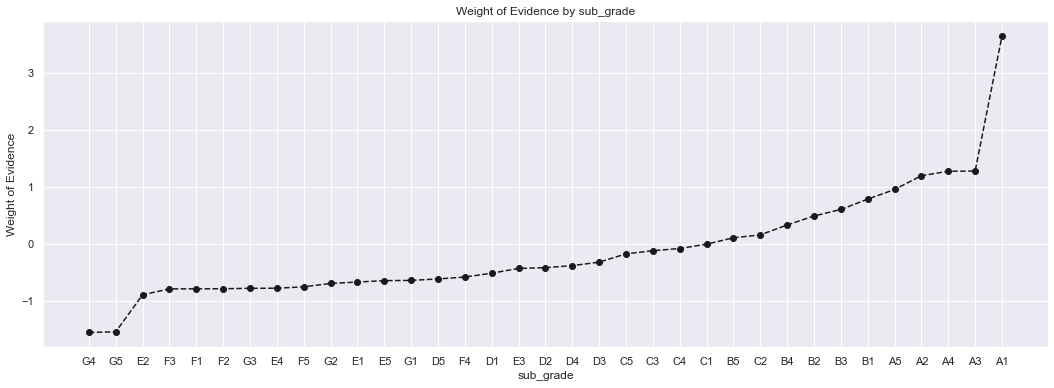

In [413]:
plot_by_woe(df_temp)

In [414]:
df_inputs_prepr_final['sub_grade:G5_G3_G4'] = sum([df_inputs_prepr['sub_grade:G5'],
                                             df_inputs_prepr['sub_grade:G3'],
                                             df_inputs_prepr['sub_grade:G4']])


df_inputs_prepr_final['sub_grade:G1_G2_F3_F5'] = sum([df_inputs_prepr['sub_grade:G1'],
                                                df_inputs_prepr['sub_grade:G2'],
                                                df_inputs_prepr['sub_grade:F3'],
                                                df_inputs_prepr['sub_grade:F5']])                                            
                                                             
df_inputs_prepr_final['sub_grade:E2_E4_F4_E5_F1_F2'] = sum([df_inputs_prepr['sub_grade:E2'],
                                                      df_inputs_prepr['sub_grade:E4'],
                                                      df_inputs_prepr['sub_grade:F4'],
                                                      df_inputs_prepr['sub_grade:E5'],
                                                      df_inputs_prepr['sub_grade:F1'],
                                                      df_inputs_prepr['sub_grade:F2']]) 


## Preprocessing Continuous Variables

In [415]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    # Subsetting the rows
    df = df.iloc[:, [0,1,3]]
    # Renaming the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # Calculating proportion of good obs
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # Calculating number of good obs
    df['n_good'] = df['prop_good'] * df['n_obs']
    # Calculating number of bad obs
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WOE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WOE'] = df['WOE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [416]:
# Term
df_inputs_prepr['term_int'].unique()

array([36., 60.])

In [417]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,36.0,67390,0.984182,0.722627,66324.0,1066.0,0.724393,0.627428,0.143706,NaN,NaN,0.043165
1,60.0,25867,0.975529,0.277373,25234.0,633.0,0.275607,0.372572,-0.301456,0.008653,0.445161,0.043165


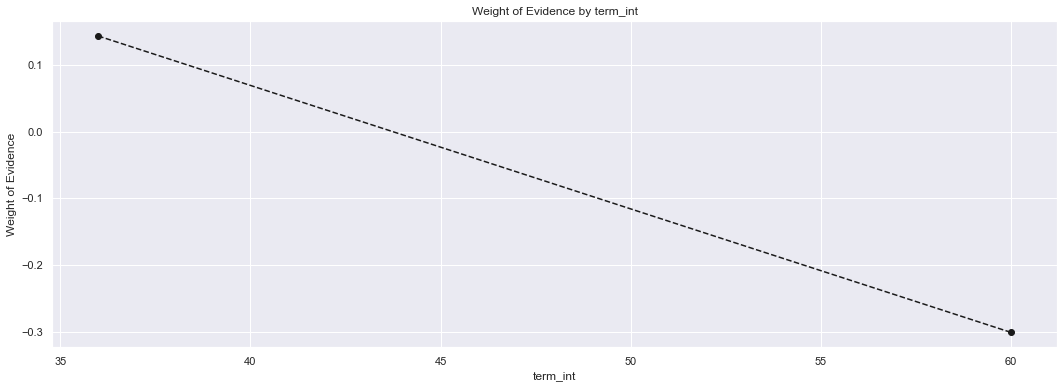

In [418]:
plot_by_woe(df_temp)

In [419]:
# Creating dummy variables
df_inputs_prepr_final['term:36'] = np.where((df_inputs_prepr['term_int'] == 36.0 ), 1, 0)
df_inputs_prepr_final['term:60'] = np.where((df_inputs_prepr['term_int'] == 60.0 ), 1, 0)

In [420]:
# Employment Length
df_inputs_prepr['emp_length_int'].unique()

array([ 5.,  0., 10.,  4.,  8.,  2.,  3.,  7.,  6.,  1.,  9.])

In [421]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,11402,0.978425,0.122264,11156.0,246.0,0.121846,0.144791,-0.172532,NaN,NaN,0.013857
1,1.0,5830,0.981475,0.062515,5722.0,108.0,0.062496,0.063567,-0.016990,0.003050,0.155541,0.013857
2,2.0,8313,0.979670,0.089141,8144.0,169.0,0.088949,0.099470,-0.111795,0.001805,0.094804,0.013857
3,3.0,7341,0.981746,0.078718,7207.0,134.0,0.078715,0.078870,-0.001965,0.002076,0.109830,0.013857
4,4.0,5577,0.981890,0.059802,5476.0,101.0,0.059809,0.059447,0.006077,0.000144,0.008041,0.013857
5,5.0,6190,0.984006,0.066376,6091.0,99.0,0.066526,0.058270,0.132515,0.002117,0.126438,0.013857
6,6.0,5161,0.977717,0.055342,5046.0,115.0,0.055113,0.067687,-0.205514,0.006289,0.338029,0.013857
7,7.0,5207,0.982908,0.055835,5118.0,89.0,0.055899,0.052384,0.064950,0.005190,0.270464,0.013857
8,8.0,4490,0.981960,0.048147,4409.0,81.0,0.048155,0.047675,0.010021,0.000948,0.054929,0.013857
9,9.0,3531,0.980459,0.037863,3462.0,69.0,0.037812,0.040612,-0.071438,0.001501,0.081459,0.013857


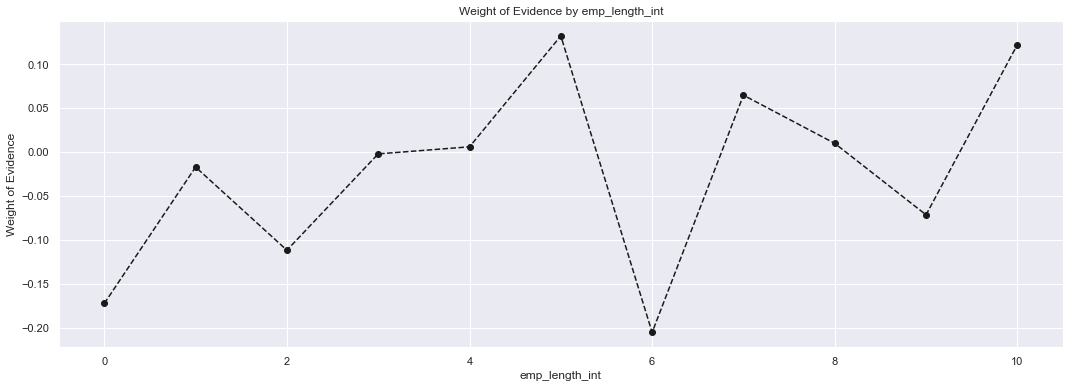

In [422]:
plot_by_woe(df_temp)

Here since all the classes have different weight of evidence, so we create dummy variables for all.

In [423]:
# Classing & creating dummy variables
df_inputs_prepr_final['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0.0]),1,0)
df_inputs_prepr_final['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1.0]),1,0)
df_inputs_prepr_final['emp_length:2'] = np.where(df_inputs_prepr['emp_length_int'].isin([2.0]),1,0)
df_inputs_prepr_final['emp_length:3'] = np.where(df_inputs_prepr['emp_length_int'].isin([3.0]),1,0)
df_inputs_prepr_final['emp_length:4'] = np.where(df_inputs_prepr['emp_length_int'].isin([4.0]),1,0)
df_inputs_prepr_final['emp_length:5'] = np.where(df_inputs_prepr['emp_length_int'].isin([5.0]),1,0)
df_inputs_prepr_final['emp_length:6'] = np.where(df_inputs_prepr['emp_length_int'].isin([6.0]),1,0)
df_inputs_prepr_final['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7.0]),1,0)
df_inputs_prepr_final['emp_length:8'] = np.where(df_inputs_prepr['emp_length_int'].isin([8.0]),1,0)
df_inputs_prepr_final['emp_length:9'] = np.where(df_inputs_prepr['emp_length_int'].isin([9.0]),1,0)
df_inputs_prepr_final['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10.0]),1,0)

In [424]:
df_inputs_prepr['months_issue_d_date'].unique()

array([ 58., 116.,  63.,  85.,  57.,  38.,  59.,  56.,  54.,  52.,  47.,
        48.,  72.,  37.,  44.,  45.,  41.,  60.,  43.,  46.,  50.,  42.,
        62., 106.,  53.,  55.,  39.,  75.,  64.,  49.,  86., 105.,  51.,
        89.,  98.,  40., 100.,  65.,  61.,  71., 117.,  36.,  84.,  69.,
        66.,  68.,  76.,  96., 108.,  70.,  83.,  77., 118.,  81.,  67.,
        73.,  99., 101.,  78.,  79.,  82., 120., 102., 103.,  93.,  87.,
        97.,  80.,  92., 109.,  88., 114., 107.,  74.,  91.,  95.,  90.,
        94., 125., 122., 115., 104., 113., 121., 119., 124., 112., 123.,
       110., 126., 111.])

We will first fine class the values into categories. Next we will determine final categories by combining few of the initial fine class categories into bigger categories, if needed.

In [425]:
df_inputs_prepr['months_issue_d_date_factor'] = pd.cut(df_inputs_prepr['months_issue_d_date'], 50)

In [426]:
df_inputs_prepr['months_issue_d_date_factor']

168117      (57.6, 59.4]
41650     (115.2, 117.0]
197654      (61.2, 63.0]
23389       (84.6, 86.4]
159468      (55.8, 57.6]
               ...      
455138      (46.8, 48.6]
352189      (39.6, 41.4]
81956       (48.6, 50.4]
103154      (50.4, 52.2]
253418     (35.91, 37.8]
Name: months_issue_d_date_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [427]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_issue_d_date_factor', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,months_issue_d_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(35.91, 37.8]",7036,0.976407,0.075447,6870.0,166.0,0.075034,0.097705,-0.264001,NaN,NaN,inf
1,"(37.8, 39.6]",9974,0.973130,0.106952,9706.0,268.0,0.106009,0.157740,-0.397420,0.003277,0.133419,inf
2,"(39.6, 41.4]",9530,0.975971,0.102191,9301.0,229.0,0.101586,0.134785,-0.282778,0.002840,0.114643,inf
3,"(41.4, 43.2]",7264,0.977836,0.077892,7103.0,161.0,0.077579,0.094762,-0.200065,0.001865,0.082713,inf
4,"(43.2, 45.0]",7267,0.977570,0.077924,7104.0,163.0,0.077590,0.095939,-0.212270,0.000266,0.012205,inf
5,"(45.0, 46.8]",3061,0.984319,0.032823,3013.0,48.0,0.032908,0.028252,0.152558,0.006749,0.364827,inf
6,"(46.8, 48.6]",6173,0.982828,0.066193,6067.0,106.0,0.066264,0.062390,0.060248,0.001490,0.092310,inf
7,"(48.6, 50.4]",5843,0.980661,0.062655,5730.0,113.0,0.062583,0.066510,-0.060850,0.002168,0.121097,inf
8,"(50.4, 52.2]",5069,0.985599,0.054355,4996.0,73.0,0.054567,0.042966,0.239001,0.004938,0.299850,inf
9,"(52.2, 54.0]",4565,0.988171,0.048951,4511.0,54.0,0.049269,0.031783,0.438357,0.002572,0.199357,inf


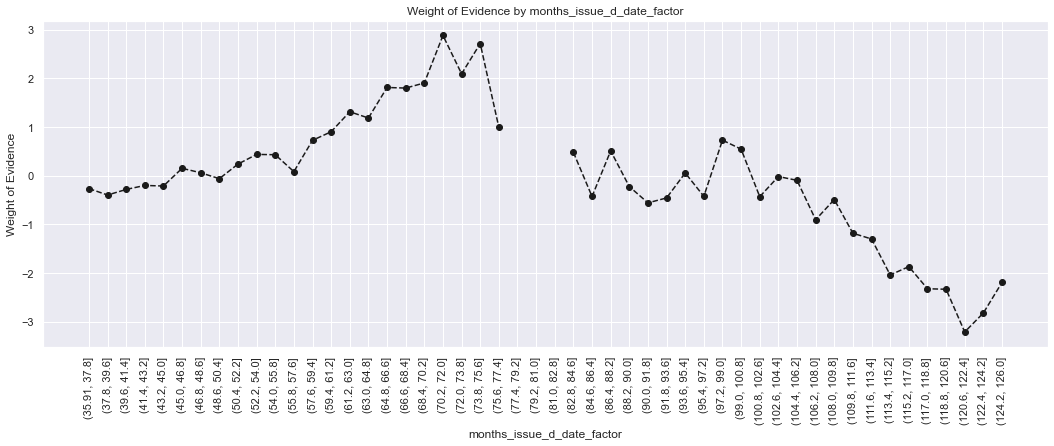

In [428]:
df_temp['months_issue_d_date_factor'] = df_temp['months_issue_d_date_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [429]:
df_inputs_prepr_final['months_issue_d_date:<49'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(49)),1,0)
df_inputs_prepr_final['months_issue_d_date:49-54'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(49,54)),1,0)
df_inputs_prepr_final['months_issue_d_date:55-61'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(54,61)),1,0)
df_inputs_prepr_final['months_issue_d_date:62-77'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(61,77)),1,0)
df_inputs_prepr_final['months_issue_d_date:>77'] = np.where(df_inputs_prepr['months_issue_d_date'].isin(range(77, int(df_inputs_prepr['months_issue_d_date'].max()))),1,0)


In [430]:
# Exploring Interest Rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [431]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(5.399, 5.833]",186,1.000000,0.001994,186.0,0.0,0.002031,0.000000,inf,NaN,NaN,inf
1,"(5.833, 6.246]",2060,0.999515,0.022089,2059.0,1.0,0.022488,0.000589,3.643043,0.000485,inf,inf
2,"(6.246, 6.658]",1966,0.994914,0.021082,1956.0,10.0,0.021364,0.005886,1.289139,0.004601,2.353904,inf
3,"(6.658, 7.071]",470,0.993617,0.005040,467.0,3.0,0.005101,0.001766,1.060784,0.001297,0.228355,inf
4,"(7.071, 7.484]",790,0.989873,0.008471,782.0,8.0,0.008541,0.004709,0.595480,0.003744,0.465304,inf
5,"(7.484, 7.897]",3155,0.996197,0.033831,3143.0,12.0,0.034328,0.007063,1.581094,0.006323,0.985613,inf
6,"(7.897, 8.31]",2472,0.993528,0.026507,2456.0,16.0,0.026825,0.009417,1.046768,0.002669,0.534326,inf
7,"(8.31, 8.722]",1590,0.992453,0.017050,1578.0,12.0,0.017235,0.007063,0.892074,0.001075,0.154694,inf
8,"(8.722, 9.135]",2489,0.992768,0.026690,2471.0,18.0,0.026988,0.010594,0.935074,0.000315,0.043000,inf
9,"(9.135, 9.548]",1644,0.989051,0.017629,1626.0,18.0,0.017759,0.010594,0.516574,0.003717,0.418500,inf


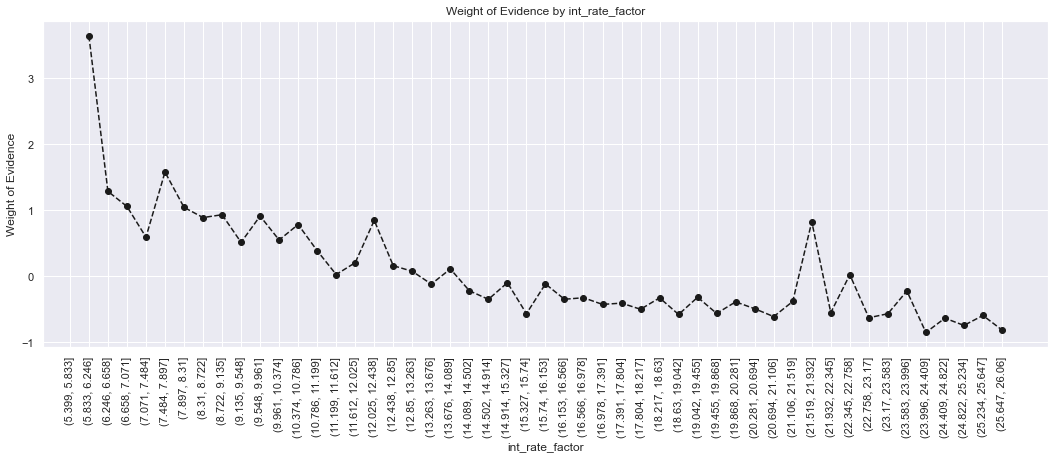

In [432]:
df_temp['int_rate_factor'] = df_temp['int_rate_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [433]:
df_inputs_prepr_final['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548),1,0)
df_inputs_prepr_final['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548 ) & (df_inputs_prepr['int_rate'] <= 12.025),1,0)
df_inputs_prepr_final['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74),1,0)
df_inputs_prepr_final['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74 )& (df_inputs_prepr['int_rate'] <= 20.281),1,0)
df_inputs_prepr_final['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281),1,0)

In [434]:
# Exploring funded amount
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)

In [435]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(465.5, 1190.0]",282,0.992908,0.003024,280.0,2.0,0.003058,0.001177,0.954710,NaN,NaN,0.050892
1,"(1190.0, 1880.0]",729,0.993141,0.007817,724.0,5.0,0.007908,0.002943,0.988421,0.000233,0.033711,0.050892
2,"(1880.0, 2570.0]",1504,0.982048,0.016127,1477.0,27.0,0.016132,0.015892,0.014999,0.011093,0.973422,0.050892
3,"(2570.0, 3260.0]",1788,0.988255,0.019173,1767.0,21.0,0.019299,0.012360,0.445583,0.006207,0.430585,0.050892
4,"(3260.0, 3950.0]",1130,0.980531,0.012117,1108.0,22.0,0.012102,0.012949,-0.067663,0.007724,0.513247,0.050892
5,"(3950.0, 4640.0]",2277,0.983311,0.024416,2239.0,38.0,0.024454,0.022366,0.089266,0.002780,0.156929,0.050892
6,"(4640.0, 5330.0]",4024,0.985089,0.043150,3964.0,60.0,0.043295,0.035315,0.203732,0.001778,0.114466,0.050892
7,"(5330.0, 6020.0]",4310,0.988399,0.046216,4260.0,50.0,0.046528,0.029429,0.458069,0.003310,0.254337,0.050892
8,"(6020.0, 6710.0]",1728,0.982639,0.018529,1698.0,30.0,0.018546,0.017657,0.049076,0.005760,0.408992,0.050892
9,"(6710.0, 7400.0]",2924,0.982558,0.031354,2873.0,51.0,0.031379,0.030018,0.044354,0.000081,0.004723,0.050892


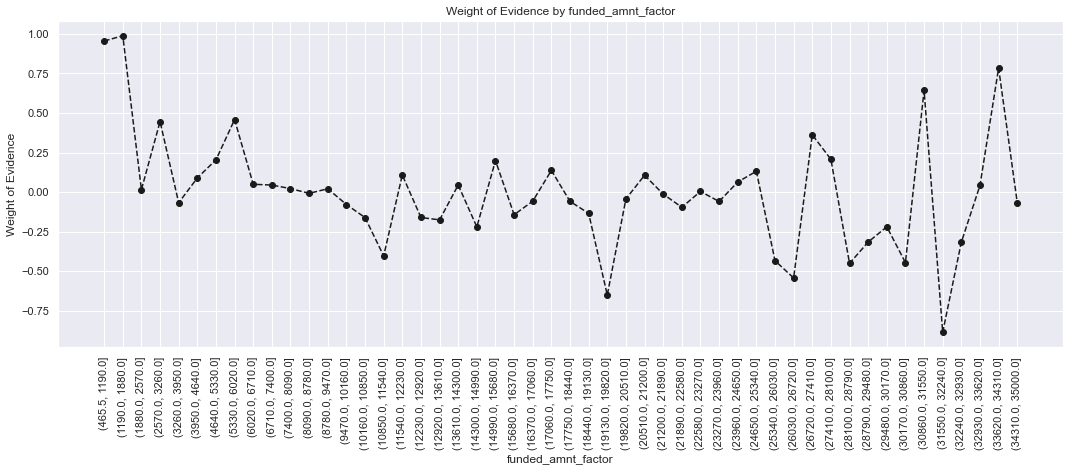

In [436]:
df_temp['funded_amnt_factor'] = df_temp['funded_amnt_factor'].astype(str)
plot_by_woe(df_temp, 90)

We see that there seems to be no association between 'funded amount' and WOE. Hence we will not use this variable in the PD model.

In [437]:
# Exploring months since earliest credit line
df_inputs_prepr['months_since_earliest_cr_line'].unique()

array([421., 375., 351., 477., 367., 212., 359., 177., 198., 239., 227.,
       298., 315., 282., 158., 241., 339., 213., 341., 277., 194., 196.,
       174., 224., 171., 429., 252., 165., 264., 576., 150., 233., 214.,
       205., 286., 220., 151., 237., 225., 303., 163., 160., 217., 235.,
       344., 412., 125., 103., 395., 333., 578., 185., 195., 434., 110.,
       136., 383., 142., 207., 209., 424., 211., 323., 154., 159., 532.,
       329., 327., 133., 284., 219., 398., 228., 283., 259., 153., 353.,
       320., 197., 254., 186., 116., 365., 420., 183.,  88., 377., 178.,
       180., 271., 326., 272., 137., 371., 363., 240., 374., 231., 360.,
       584., 236., 132., 187., 232., 316., 288., 461., 250., 229., 169.,
       443., 143., 305., 505., 188., 167., 346., 226., 337., 544., 200.,
       276., 520., 146., 203., 181., 289., 255., 215., 260., 251., 275.,
       210., 269., 407., 184., 267., 221., 138., 376., 168., 173., 300.,
       265., 470., 311., 411., 223., 285., 492., 20

In [438]:
df_inputs_prepr['months_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['months_since_earliest_cr_line'], 50)

In [439]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'months_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,months_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.587, 11.74]",6,0.833333,0.000064,5.0,1.0,0.000055,0.000589,-2.377495,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",163,0.975460,0.001748,159.0,4.0,0.001737,0.002354,-0.304323,NaN,NaN,inf
7,"(82.18, 93.92]",497,0.975855,0.005329,485.0,12.0,0.005297,0.007063,-0.287691,0.000395,0.016632,inf
8,"(93.92, 105.66]",679,0.958763,0.007281,651.0,28.0,0.007110,0.016480,-0.840628,0.017092,0.552937,inf
9,"(105.66, 117.4]",1285,0.974319,0.013779,1252.0,33.0,0.013674,0.019423,-0.350943,0.015556,0.489685,inf


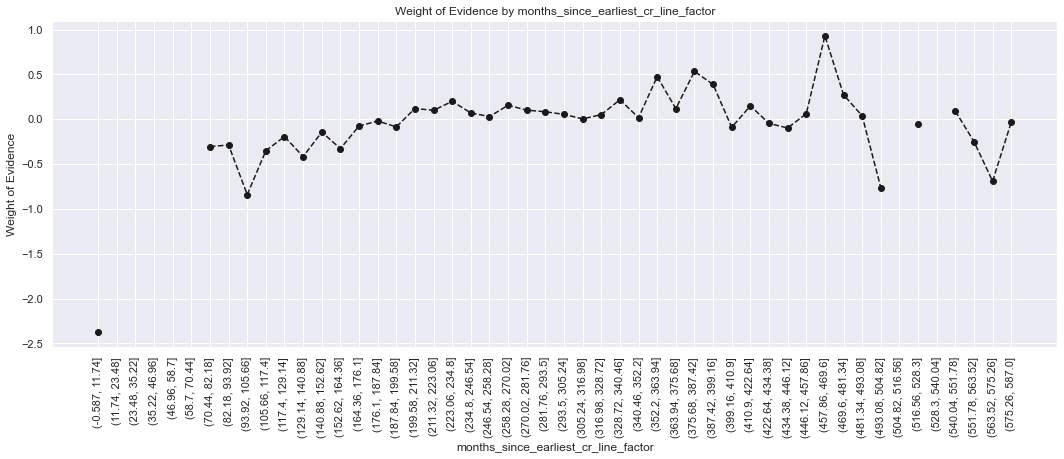

In [440]:
df_temp['months_since_earliest_cr_line_factor'] = df_temp['months_since_earliest_cr_line_factor'].astype(str)
plot_by_woe(df_temp, 90)

In [441]:
df_inputs_prepr_final['months_since_earliest_cr_line:<153'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(153)),1,0)
df_inputs_prepr_final['months_since_earliest_cr_line:154-258'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(153,258)),1,0)
df_inputs_prepr_final['months_since_earliest_cr_line:<258-387'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(258,387)),1,0)
df_inputs_prepr_final['months_since_earliest_cr_line:<387'] = np.where(df_inputs_prepr['months_since_earliest_cr_line'].isin(range(258,int(df_inputs_prepr['months_since_earliest_cr_line'].max()))),1,0)                                                                  

In [442]:
# Exploring Installment 
df_inputs_prepr['installment'].unique()

array([648.8 , 207.47, 789.29, ..., 773.98,  88.49, 608.37])

In [443]:
len(df_inputs_prepr['installment'].unique())

26853

In [444]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)

In [445]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(14.358, 43.598]",438,0.993151,0.004697,435.0,3.0,0.004751,0.001766,0.989801,NaN,NaN,inf
1,"(43.598, 71.445]",1182,0.989002,0.012675,1169.0,13.0,0.012768,0.007652,0.512022,0.004149,0.477779,inf
2,"(71.445, 99.293]",1718,0.985448,0.018422,1693.0,25.0,0.018491,0.014715,0.228449,0.003553,0.283573,inf
3,"(99.293, 127.14]",2226,0.986074,0.023870,2195.0,31.0,0.023974,0.018246,0.273017,0.000625,0.044569,inf
4,"(127.14, 154.988]",2513,0.984481,0.026947,2474.0,39.0,0.027021,0.022955,0.163097,0.001593,0.109920,inf
5,"(154.988, 182.836]",4213,0.984572,0.045176,4148.0,65.0,0.045305,0.038258,0.169061,0.000091,0.005964,inf
6,"(182.836, 210.683]",4273,0.987128,0.045820,4218.0,55.0,0.046069,0.032372,0.352850,0.002557,0.183789,inf
7,"(210.683, 238.531]",3730,0.983646,0.039997,3669.0,61.0,0.040073,0.035903,0.109868,0.003482,0.242983,inf
8,"(238.531, 266.378]",4680,0.979274,0.050184,4583.0,97.0,0.050056,0.057092,-0.131535,0.004373,0.241402,inf
9,"(266.378, 294.226]",4892,0.979763,0.052457,4793.0,99.0,0.052349,0.058270,-0.107141,0.000489,0.024394,inf


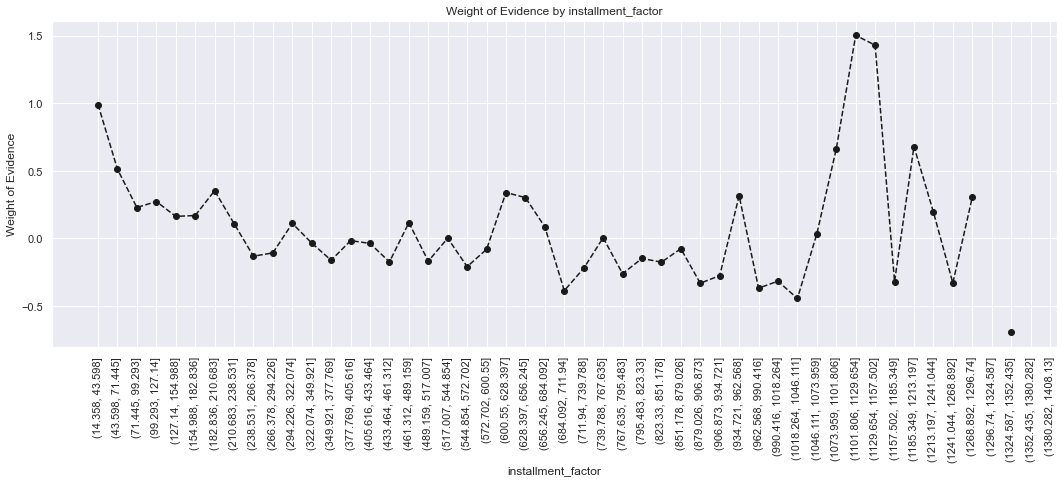

In [446]:
df_temp['installment_factor'] = df_temp['installment_factor'].astype(str)
plot_by_woe(df_temp, 90)

We see that there seems to be no association between 'installment' and WOE. Hence we will not use this variable in the PD model.

In [447]:
# Exploring delinq_2yrs
df_inputs_prepr['delinq_2yrs'].unique()

array([ 2.,  0.,  1.,  3.,  4.,  8.,  5.,  6.,  9.,  7., 12., 13., 15.,
       11., 10., 22., 18., 19., 16., 14.])

In [448]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,76555,0.982339,0.820904,75203.0,1352.0,0.821370,0.795762,0.031673,NaN,NaN,inf
1,1.0,11246,0.980971,0.120591,11032.0,214.0,0.120492,0.125956,-0.044353,0.001368,0.076027,inf
2,2.0,3279,0.975602,0.035161,3199.0,80.0,0.034940,0.047087,-0.298366,0.005369,0.254012,inf
3,3.0,1153,0.978317,0.012364,1128.0,25.0,0.012320,0.014715,-0.177607,0.002715,0.120759,inf
4,4.0,459,0.971678,0.004922,446.0,13.0,0.004871,0.007652,-0.451563,0.006640,0.273956,inf
5,5.0,251,0.976096,0.002691,245.0,6.0,0.002676,0.003531,-0.277434,0.004418,0.174129,inf
6,6.0,136,0.963235,0.001458,131.0,5.0,0.001431,0.002943,-0.721173,0.012860,0.443739,inf
7,7.0,68,0.985294,0.000729,67.0,1.0,0.000732,0.000589,0.217760,0.022059,0.938933,inf
8,8.0,40,0.975000,0.000429,39.0,1.0,0.000426,0.000589,-0.323371,0.010294,0.541131,inf
9,9.0,19,1.000000,0.000204,19.0,0.0,0.000208,0.000000,inf,0.025000,inf,inf


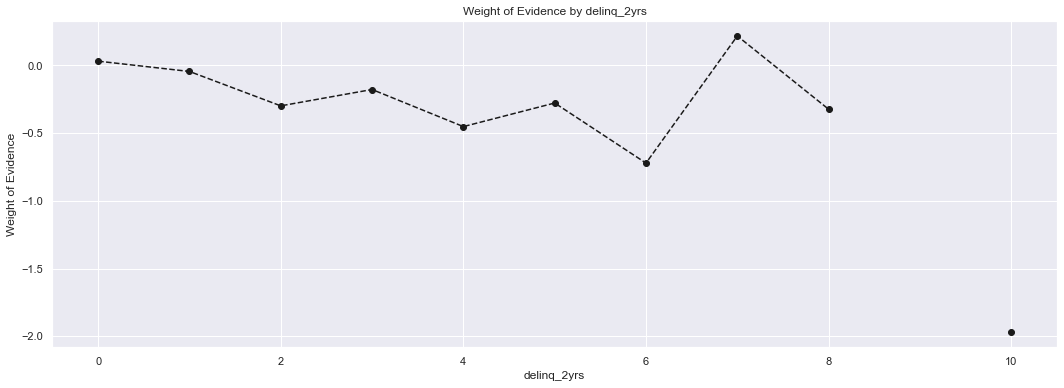

In [449]:
plot_by_woe(df_temp)

In [450]:
df_inputs_prepr_final['delinq_2yrs:<5'] = np.where((df_inputs_prepr['delinq_2yrs'] <= 5.0),1,0)
df_inputs_prepr_final['delinq_2yrs:5-10'] = np.where((df_inputs_prepr['delinq_2yrs'] > 5.0) & (df_inputs_prepr['delinq_2yrs'] < 10.0),1,0)
df_inputs_prepr_final['delinq_2yrs:>10'] = np.where((df_inputs_prepr['delinq_2yrs'] > 10.0),1,0)

In [451]:
# Exploring inq_last_6mths
df_inputs_prepr['inq_last_6mths'].unique()

array([ 0.,  1.,  2.,  3.,  5.,  6.,  4.,  7.,  8., 10., 12.,  9., 13.,
       11., 19., 15., 31., 18., 14.])

In [452]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,48560,0.984555,0.520712,47810.0,750.0,0.522183,0.441436,0.167984,NaN,NaN,inf
1,1.0,25866,0.982487,0.277363,25413.0,453.0,0.277562,0.266627,0.040191,0.002069,0.127793,inf
2,2.0,11451,0.979128,0.122790,11212.0,239.0,0.122458,0.140671,-0.138656,0.003358,0.178848,inf
3,3.0,5066,0.981840,0.054323,4974.0,92.0,0.054326,0.054149,0.003258,0.002711,0.141915,inf
4,4.0,1430,0.946154,0.015334,1353.0,77.0,0.014778,0.045321,-1.120659,0.035686,1.123917,inf
5,5.0,555,0.938739,0.005951,521.0,34.0,0.005690,0.020012,-1.257543,0.007415,0.136885,inf
6,6.0,241,0.904564,0.002584,218.0,23.0,0.002381,0.013537,-1.737932,0.034174,0.480389,inf
7,7.0,35,0.628571,0.000375,22.0,13.0,0.000240,0.007652,-3.460840,0.275993,1.722908,inf
8,8.0,29,0.724138,0.000311,21.0,8.0,0.000229,0.004709,-3.021852,0.095567,0.438988,inf
9,9.0,8,0.500000,0.000086,4.0,4.0,0.000044,0.002354,-3.986933,0.224138,0.965081,inf


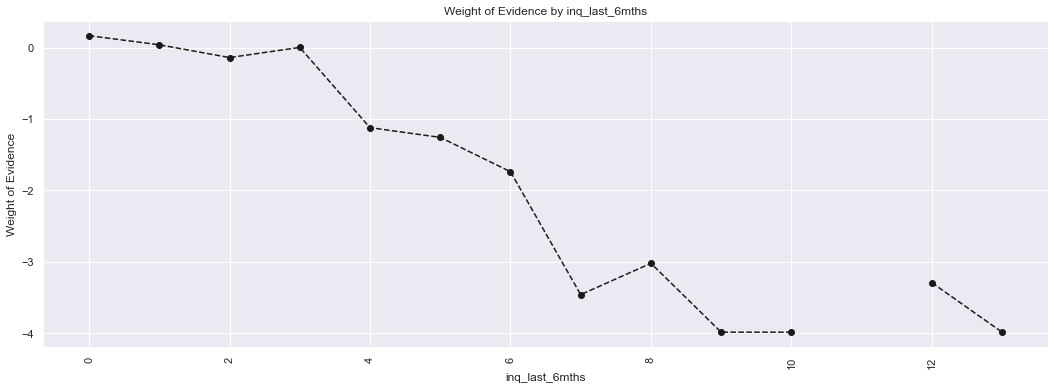

In [453]:
plot_by_woe(df_temp, 90)

In [454]:
df_inputs_prepr_final['inq_last_6mths:<4'] = np.where((df_inputs_prepr['inq_last_6mths'] <= 4.0),1,0)
df_inputs_prepr_final['inq_last_6mths:4-6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 4.0) & (df_inputs_prepr['inq_last_6mths'] < 6.0),1,0)
df_inputs_prepr_final['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6.0),1,0)

In [455]:
# Exploring open_acc
df_inputs_prepr['open_acc'].unique()

array([ 8., 12., 11.,  2., 25., 18., 13., 14.,  7., 21.,  9., 10., 15.,
       22., 20.,  5.,  6., 24., 17.,  3., 16., 26., 19., 23., 35.,  4.,
       30., 27., 29., 28., 51., 33., 31., 49.,  0., 32., 38., 34., 36.,
       39., 37.,  1., 40., 44., 46., 42., 47., 41., 52., 54., 45., 58.,
       43., 50., 48.])

In [456]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,6,0.833333,0.000064,5.0,1.0,0.000055,0.000589,-2.377495,NaN,NaN,inf
1,1.0,28,0.892857,0.000300,25.0,3.0,0.000273,0.001766,-1.866669,0.059524,0.510826,inf
2,2.0,380,0.984211,0.004075,374.0,6.0,0.004085,0.003531,0.145564,0.091353,2.012233,inf
3,3.0,1087,0.981601,0.011656,1067.0,20.0,0.011654,0.011772,-0.010059,0.002610,0.155622,inf
4,4.0,2505,0.984830,0.026861,2467.0,38.0,0.026945,0.022366,0.186239,0.003230,0.196298,inf
5,5.0,4257,0.980973,0.045648,4176.0,81.0,0.045610,0.047675,-0.044273,0.003858,0.230512,inf
6,6.0,6159,0.985063,0.066043,6067.0,92.0,0.066264,0.054149,0.201898,0.004090,0.246171,inf
7,7.0,7538,0.986999,0.080830,7440.0,98.0,0.081260,0.057681,0.342726,0.001937,0.140828,inf
8,8.0,8352,0.982998,0.089559,8210.0,142.0,0.089670,0.083579,0.070348,0.004001,0.272378,inf
9,9.0,8794,0.982829,0.094299,8643.0,151.0,0.094399,0.088876,0.060292,0.000169,0.010056,inf


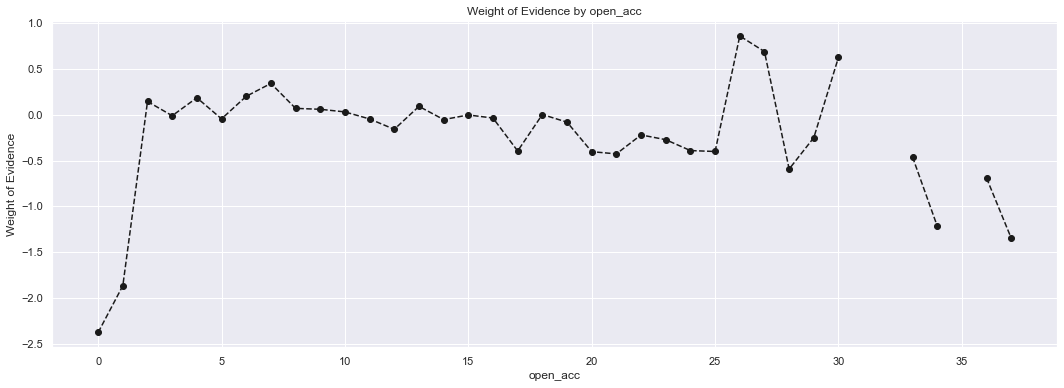

In [457]:
plot_by_woe(df_temp)

We see that except the '0' value for the open acc, we cannot see any significant relationship between woe and open acc. Moreover, we have only 30 observations for the '0' value. Hence, we will omit this variable from our PD model.

In [458]:
# Exploring pub_rec
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  2.,  1.,  3.,  4.,  5.,  7.,  8.,  6., 21., 14., 10., 11.,
        9., 34., 12., 18.])

In [459]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,81063,0.982495,0.869243,79644.0,1419.0,0.869875,0.835197,0.040681,NaN,NaN,inf
1,1.0,10489,0.976738,0.112474,10245.0,244.0,0.111896,0.143614,-0.249556,0.005758,0.290237,inf
2,2.0,1150,0.980000,0.012332,1127.0,23.0,0.012309,0.013537,-0.095113,0.003262,0.154443,inf
3,3.0,348,0.971264,0.003732,338.0,10.0,0.003692,0.005886,-0.466472,0.008736,0.371359,inf
4,4.0,110,0.981818,0.001180,108.0,2.0,0.001180,0.001177,0.002051,0.010554,0.468523,inf
5,5.0,47,1.000000,0.000504,47.0,0.0,0.000513,0.000000,inf,0.018182,inf,inf
6,6.0,27,0.962963,0.000290,26.0,1.0,0.000284,0.000589,-0.728836,0.037037,inf,inf
7,7.0,7,1.000000,0.000075,7.0,0.0,0.000076,0.000000,inf,0.037037,inf,inf
8,8.0,6,1.000000,0.000064,6.0,0.0,0.000066,0.000000,inf,0.000000,NaN,inf
9,9.0,3,1.000000,0.000032,3.0,0.0,0.000033,0.000000,inf,0.000000,NaN,inf


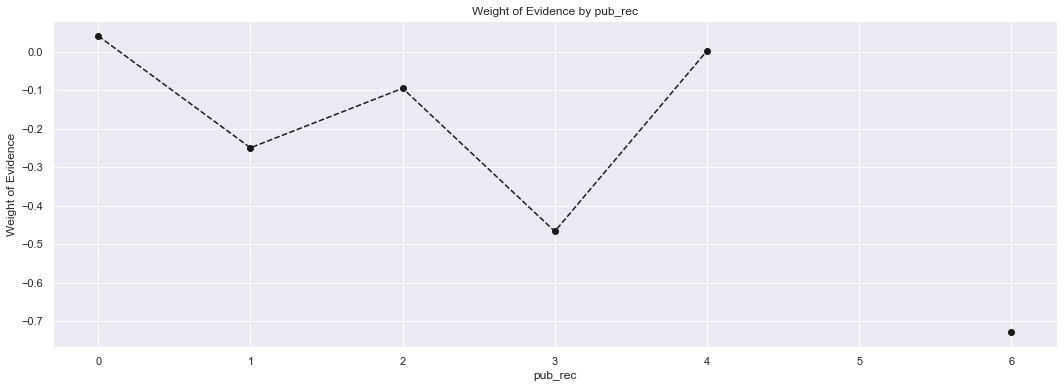

In [460]:
plot_by_woe(df_temp)

We observe no significant relationship between WOE and pub_rec. Hence, we omit this variable from our PD model.

In [461]:
#Exploring total_acc
df_inputs_prepr['total_acc'].unique()

array([ 18.,  34.,  25.,   4.,  57.,  50.,  19.,  23.,  30.,  47.,  17.,
        45.,  20.,  29.,  36.,  27.,  51.,  24.,  28.,  21.,  16.,  40.,
        15.,  26.,  13.,  39.,  32.,  12.,   5.,  22.,  42.,  33.,  11.,
         8.,  14.,  37.,  55.,  54.,   9.,  35.,  31.,  46.,   6.,  56.,
        59.,  38.,  10.,   7.,  44.,  41.,  52.,  63.,  48.,  62.,  43.,
        53.,   3.,  49.,  61.,  58.,  66.,  60.,  64.,   0.,  65.,  76.,
        69.,  70.,  71.,  67.,  80.,   2.,  68.,  79.,  73.,  89.,   1.,
        74.,  81.,  75.,  72.,  87., 116.,  85.,  77.,  94.,  84.,  92.,
        95.,  78.,  90., 150.,  86.,  88.,  83.,  96.])

In [462]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,6,0.833333,0.000064,5.0,1.0,0.000055,0.000589,-2.377495,NaN,NaN,inf
1,1.0,4,1.000000,0.000043,4.0,0.0,0.000044,0.000000,inf,0.166667,inf,inf
2,2.0,20,0.800000,0.000214,16.0,4.0,0.000175,0.002354,-2.600638,0.200000,inf,inf
3,3.0,94,0.978723,0.001008,92.0,2.0,0.001005,0.001177,-0.158291,0.178723,2.442347,inf
4,4.0,288,0.982639,0.003088,283.0,5.0,0.003091,0.002943,0.049076,0.003915,0.207368,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
91,94.0,1,1.000000,0.000011,1.0,0.0,0.000011,0.000000,inf,0.000000,NaN,inf
92,95.0,1,1.000000,0.000011,1.0,0.0,0.000011,0.000000,inf,0.000000,NaN,inf
93,96.0,1,1.000000,0.000011,1.0,0.0,0.000011,0.000000,inf,0.000000,NaN,inf
94,116.0,1,1.000000,0.000011,1.0,0.0,0.000011,0.000000,inf,0.000000,NaN,inf


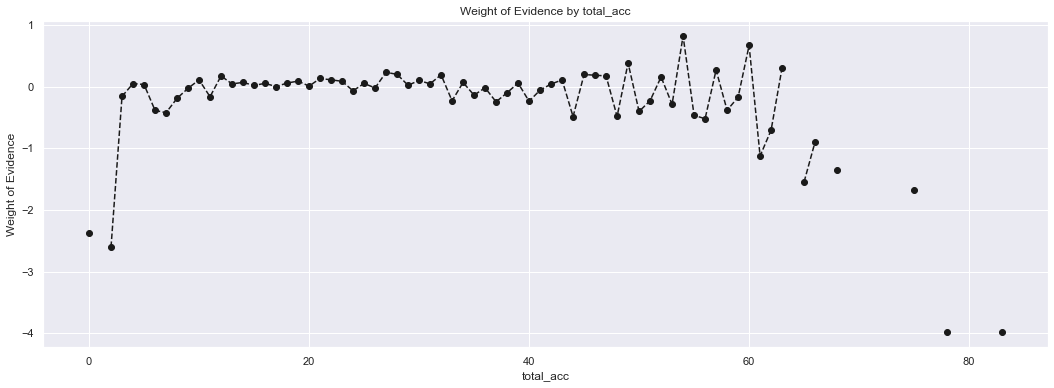

In [463]:
plot_by_woe(df_temp)

No significant relationship between WOE and total_acc can be observed. We omit this variable from our PD model.

In [464]:
# Exploring acc_now_delinq
df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4.])

In [465]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,0.0,92918,0.981790,0.996365,91226.0,1692.0,0.996374,0.995880,0.000496,NaN,NaN,inf
1,1.0,315,0.980952,0.003378,309.0,6.0,0.003375,0.003531,-0.045351,0.000838,0.045847,inf
2,2.0,21,0.952381,0.000225,20.0,1.0,0.000218,0.000589,-0.991201,0.028571,0.945850,inf
3,3.0,2,1.000000,0.000021,2.0,0.0,0.000022,0.000000,inf,0.047619,inf,inf
4,4.0,1,1.000000,0.000011,1.0,0.0,0.000011,0.000000,inf,0.000000,NaN,inf


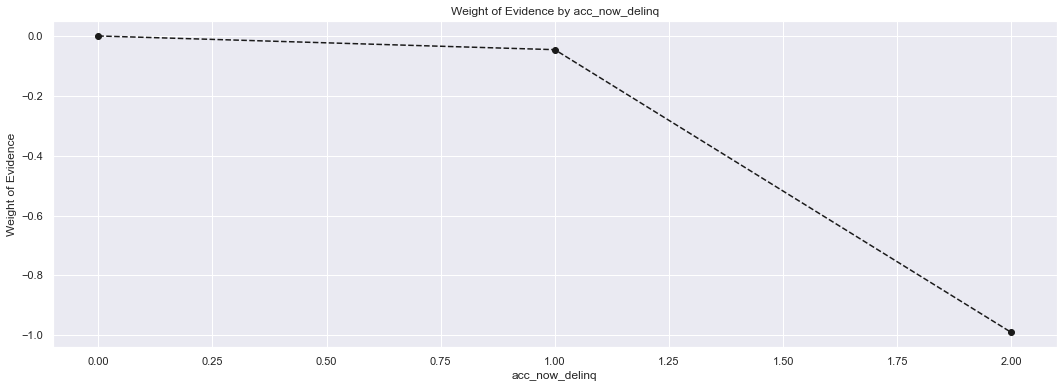

In [466]:
plot_by_woe(df_temp)

In [467]:
df_inputs_prepr_final['acc_now_delinq:<1'] = np.where((df_inputs_prepr['acc_now_delinq'] <= 1.00),1,0)
df_inputs_prepr_final['acc_now_delinq:>1'] = np.where((df_inputs_prepr['acc_now_delinq'] > 1.00),1,0)

In [468]:
# Exploring Annual Income
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-5602.104, 151858.08]",89159,0.981707,0.956057,87528.0,1631.0,0.955984,0.959976,-0.004167,NaN,NaN,inf
1,"(151858.08, 301820.16]",3688,0.983460,0.039547,3627.0,61.0,0.039614,0.035903,0.098354,0.001753,0.102522,inf
2,"(301820.16, 451782.24]",273,0.978022,0.002927,267.0,6.0,0.002916,0.003531,-0.191444,0.005438,0.289798,inf
3,"(451782.24, 601744.32]",78,1.000000,0.000836,78.0,0.0,0.000852,0.000000,inf,0.021978,inf,inf
4,"(601744.32, 751706.4]",24,0.958333,0.000257,23.0,1.0,0.000251,0.000589,-0.851439,0.041667,inf,inf
5,"(751706.4, 901668.48]",14,1.000000,0.000150,14.0,0.0,0.000153,0.000000,inf,0.041667,inf,inf
6,"(901668.48, 1051630.56]",3,1.000000,0.000032,3.0,0.0,0.000033,0.000000,inf,0.000000,NaN,inf
7,"(1051630.56, 1201592.64]",5,1.000000,0.000054,5.0,0.0,0.000055,0.000000,inf,0.000000,NaN,inf
8,"(1201592.64, 1351554.72]",2,1.000000,0.000021,2.0,0.0,0.000022,0.000000,inf,0.000000,NaN,inf
9,"(1351554.72, 1501516.8]",4,1.000000,0.000043,4.0,0.0,0.000044,0.000000,inf,0.000000,NaN,inf


We see that more than 95% of the observations fall within the first income range of -5602.104, 151858.08. Let us try fine classing the variable into 100 classes.

In [469]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-5602.104, 76877.04]",61320,0.980496,0.657538,60124.0,1196.0,0.656677,0.703943,-0.069506,NaN,NaN,inf
1,"(76877.04, 151858.08]",27839,0.984374,0.298519,27404.0,435.0,0.299308,0.256033,0.156165,0.003879,0.225672,inf
2,"(151858.08, 226839.12]",2991,0.982949,0.032073,2940.0,51.0,0.032111,0.030018,0.067406,0.001426,0.088759,inf
3,"(226839.12, 301820.16]",697,0.985653,0.007474,687.0,10.0,0.007503,0.005886,0.242816,0.002704,0.175410,inf
4,"(301820.16, 376801.2]",171,0.970760,0.001834,166.0,5.0,0.001813,0.002943,-0.484383,0.014893,0.727199,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(7125094.8, 7200075.84]",1,1.000000,0.000011,1.0,0.0,0.000011,0.000000,inf,NaN,NaN,inf
96,"(7200075.84, 7275056.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7275056.88, 7350037.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7350037.92, 7425018.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


Even splitting into 100 classes leaves us with more than 65% of the observations in the first income class. From the index no 2 income class, we see that the number of observations are very less as compared to the first two classes. Let us set the lower limit of this class as the threshold of the high income class and combine all subsequent classes into one single class.

In [470]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 150000.00,:]

Now let us observe this set of observations.

In [471]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(1747.896, 4858.08]",6,0.666667,0.000067,4.0,2.0,0.000046,0.001226,-3.289264,NaN,NaN,0.045733
1,"(4858.08, 7820.16]",15,0.933333,0.000168,14.0,1.0,0.000160,0.000613,-1.343354,0.266667,1.945910,0.045733
2,"(7820.16, 10782.24]",89,0.977528,0.000999,87.0,2.0,0.000994,0.001226,-0.209650,0.044195,1.133704,0.045733
3,"(10782.24, 13744.32]",176,0.965909,0.001975,170.0,6.0,0.001943,0.003679,-0.638372,0.011619,0.428722,0.045733
4,"(13744.32, 16706.4]",339,0.991150,0.003804,336.0,3.0,0.003840,0.001839,0.736088,0.025241,1.374460,0.045733
5,"(16706.4, 19668.48]",441,0.975057,0.004948,430.0,11.0,0.004914,0.006744,-0.316521,0.016094,1.052609,0.045733
6,"(19668.48, 22630.56]",910,0.974725,0.010210,887.0,23.0,0.010137,0.014102,-0.330060,0.000331,0.013539,0.045733
7,"(22630.56, 25592.64]",1560,0.975641,0.017503,1522.0,38.0,0.017395,0.023299,-0.292217,0.000916,0.037844,0.045733
8,"(25592.64, 28554.72]",1421,0.973258,0.015943,1383.0,38.0,0.015806,0.023299,-0.387987,0.002383,0.095770,0.045733
9,"(28554.72, 31516.8]",2599,0.981147,0.029160,2550.0,49.0,0.029144,0.030043,-0.030383,0.007888,0.357604,0.045733


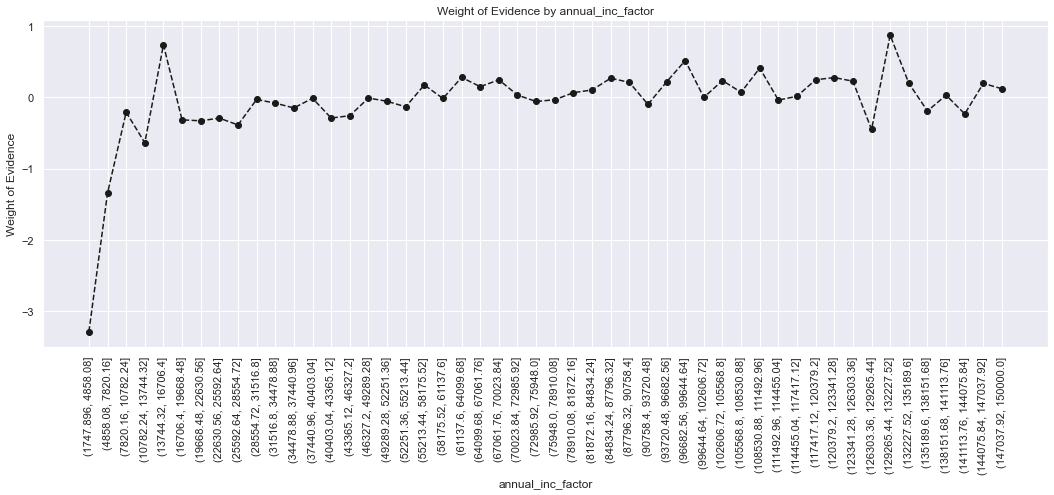

In [472]:
df_temp['annual_inc_factor'] = df_temp['annual_inc_factor'].astype(str)
plot_by_woe(df_temp,90)

We can split the valriable using fine classing with an interval width of $10000. But we observe that the first 5 classes and th bottom 8 classes have very few number of observations. So we conduct coarse classing.

In [473]:
df_inputs_prepr_final['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000),1,0)
df_inputs_prepr_final['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <=30000),1,0)
df_inputs_prepr_final['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <=40000),1,0)
df_inputs_prepr_final['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <=50000),1,0)
df_inputs_prepr_final['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <=60000),1,0)
df_inputs_prepr_final['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <=70000),1,0)
df_inputs_prepr_final['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <=80000),1,0)
df_inputs_prepr_final['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <=90000),1,0)
df_inputs_prepr_final['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <=100000),1,0)
df_inputs_prepr_final['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <=120000),1,0)
df_inputs_prepr_final['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <=140000),1,0)
df_inputs_prepr_final['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000),1,0)


In [474]:
# Exploring months since last delinquency
sum(df_inputs_prepr['mths_since_last_delinq'].isnull())/len(df_inputs_prepr['mths_since_last_delinq'])*100

53.55844601477637

As seen before, there are a lot of missing values for this categorical variable. So we create a Missing Dummy variable. Then we can conduct fine classing or coarse classing of all the non-missing variables.

In [475]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\WIN8\AppData\Roaming\Python\Python37\site-packages\pandas\core\algorithms.py:1947: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.151, 3.02]",1366,0.959004,0.031540,1310.0,56.0,0.030904,0.060803,-0.676753,NaN,NaN,inf
1,"(3.02, 6.04]",1967,0.977123,0.045417,1922.0,45.0,0.045342,0.048860,-0.074725,0.018118,0.602028,inf
2,"(6.04, 9.06]",2561,0.978524,0.059132,2506.0,55.0,0.059119,0.059718,-0.010074,0.001401,0.064651,inf
3,"(9.06, 12.08]",2444,0.981997,0.056430,2400.0,44.0,0.056618,0.047774,0.169850,0.003473,0.179924,inf
4,"(12.08, 15.1]",2421,0.981826,0.055899,2377.0,44.0,0.056076,0.047774,0.160221,0.000171,0.009630,inf
5,"(15.1, 18.12]",2326,0.980224,0.053706,2280.0,46.0,0.053788,0.049946,0.074105,0.001602,0.086116,inf
6,"(18.12, 21.14]",2274,0.975814,0.052505,2219.0,55.0,0.052348,0.059718,-0.131705,0.004410,0.205811,inf
7,"(21.14, 24.16]",2071,0.981651,0.047818,2033.0,38.0,0.047961,0.041260,0.150498,0.005838,0.282203,inf
8,"(24.16, 27.18]",2067,0.980164,0.047726,2026.0,41.0,0.047795,0.044517,0.071062,0.001487,0.079435,inf
9,"(27.18, 30.2]",1956,0.974438,0.045163,1906.0,50.0,0.044964,0.054289,-0.188445,0.005727,0.259508,inf


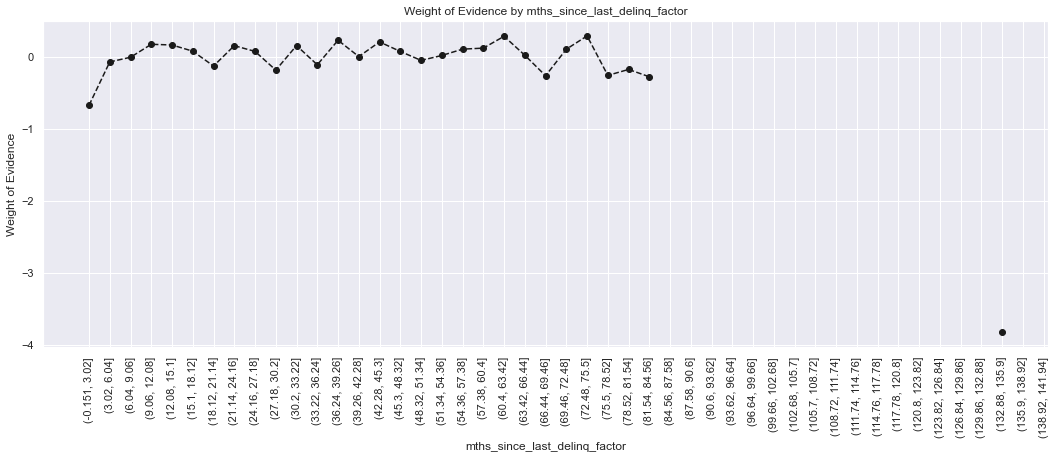

In [476]:
df_temp['mths_since_last_delinq_factor'] = df_temp['mths_since_last_delinq_factor'].astype(str)
plot_by_woe(df_temp,90)

In [477]:
df_inputs_prepr_final['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()),1,0)
df_inputs_prepr_final['mths_since_last_delinq:0-7'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=0) & (df_inputs_prepr['mths_since_last_delinq']<7),1,0)
df_inputs_prepr_final['mths_since_last_delinq:7-18'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=7) & (df_inputs_prepr['mths_since_last_delinq']<18),1,0)
df_inputs_prepr_final['mths_since_last_delinq:18-36'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=18) & (df_inputs_prepr['mths_since_last_delinq']<36),1,0)
df_inputs_prepr_final['mths_since_last_delinq:36-54'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=36) & (df_inputs_prepr['mths_since_last_delinq']<54),1,0)
df_inputs_prepr_final['mths_since_last_delinq:54-82'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >=54) & (df_inputs_prepr['mths_since_last_delinq']<82),1,0)
df_inputs_prepr_final['mths_since_last_delinq:>=82'] = np.where((df_inputs_prepr['mths_since_last_delinq']>=82),1,0)

In [478]:
# Exploring dti
len(df_inputs_prepr['dti'].unique())

3876

In [479]:
# Fine classing dti
df_inputs_prepr_temp['dti'] = pd.cut((df_inputs_prepr['dti']),50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti', df_targets_prepr)
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,dti,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.04, 0.8]",157,0.961783,0.003625,151.0,6.0,0.003562,0.006515,-0.603664,NaN,NaN,0.060942
1,"(0.8, 1.6]",230,0.982609,0.005311,226.0,4.0,0.005332,0.004343,0.205057,0.020825,0.808720,0.060942
2,"(1.6, 2.399]",284,0.982394,0.006557,279.0,5.0,0.006582,0.005429,0.192590,0.000214,0.012467,0.060942
3,"(2.399, 3.199]",394,0.979695,0.009097,386.0,8.0,0.009106,0.008686,0.047212,0.002699,0.145378,0.060942
4,"(3.199, 3.999]",489,0.991820,0.011291,485.0,4.0,0.011442,0.004343,0.968670,0.012125,0.921459,0.060942
5,"(3.999, 4.799]",572,0.979021,0.013207,560.0,12.0,0.013211,0.013029,0.013846,0.012799,0.954824,0.060942
6,"(4.799, 5.599]",670,0.977612,0.015470,655.0,15.0,0.015452,0.016287,-0.052599,0.001409,0.066445,0.060942
7,"(5.599, 6.398]",793,0.988651,0.018310,784.0,9.0,0.018495,0.009772,0.638000,0.011039,0.690599,0.060942
8,"(6.398, 7.198]",932,0.982833,0.021519,916.0,16.0,0.021609,0.017372,0.218244,0.005818,0.419757,0.060942
9,"(7.198, 7.998]",1080,0.983333,0.024937,1062.0,18.0,0.025054,0.019544,0.248353,0.000501,0.030110,0.060942


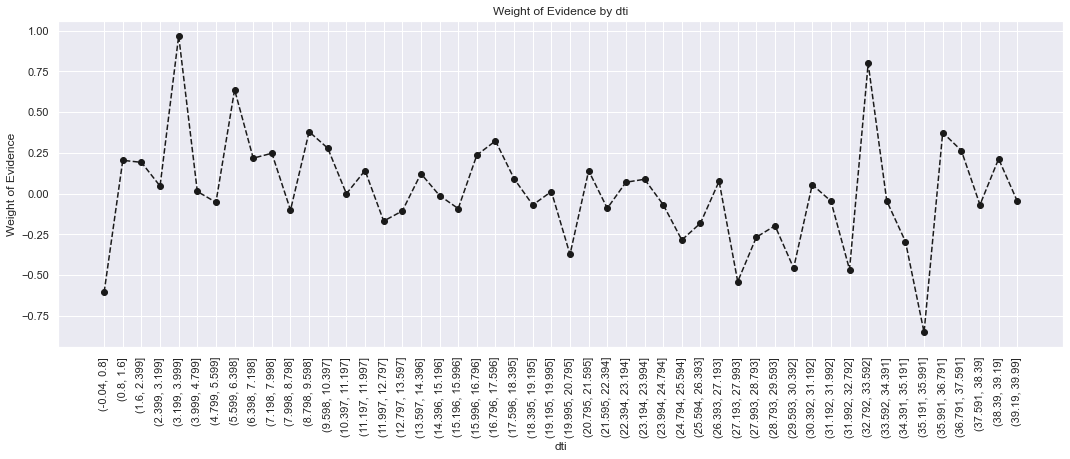

In [480]:
df_temp['dti'] = df_temp['dti'].astype(str)
plot_by_woe(df_temp, 90)

In [481]:
# Coarse Classing
df_inputs_prepr_final['dti:<12'] = np.where((df_inputs_prepr['dti'] < 12),1,0)
df_inputs_prepr_final['dti:12-18'] = np.where((df_inputs_prepr['dti']>=12) & (df_inputs_prepr['dti']<18),1,0)
df_inputs_prepr_final['dti:18-22'] = np.where((df_inputs_prepr['dti']>=18) & (df_inputs_prepr['dti']<22),1,0)
df_inputs_prepr_final['dti:22-30'] = np.where((df_inputs_prepr['dti']>=22) & (df_inputs_prepr['dti']<30),1,0)
df_inputs_prepr_final['dti:>30'] = np.where((df_inputs_prepr['dti']>=30),1,0)

In [482]:
# Exploring mths_since_last_record
df_inputs_prepr['mths_since_last_record'].unique()

array([ nan,  30., 119., 111.,  83.,  66.,  17.,  34.,  22.,  61., 101.,
        81.,  86.,  27.,  87.,  75.,  47., 110.,   0.,  67.,  70., 116.,
        98.,  60.,  77.,  40.,  76.,  15.,  56.,  29.,  59.,  54.,  48.,
        58.,  93.,  68.,  64., 112.,  90.,  92.,  18., 117., 100.,  37.,
        79., 114.,  63., 103.,  69.,  51.,  73.,  42.,  57.,  62.,  41.,
       105.,  99., 107.,  91.,  39.,  85., 106.,  49.,  88.,  82.,  65.,
       102.,  23., 109.,  96.,  52.,  72.,  74., 108.,  20.,   6.,  32.,
        35.,  53., 104.,  97.,  55., 115.,  71., 113.,  36.,  78.,  43.,
         3.,  50., 118.,  89.,   7.,  16.,  31.,  45.,  10.,  25.,  80.,
        14.,  19.,  24.,  95.,  46.,  12.,  94.,  44.,  26.,  33.,  84.,
         9.,  38.,  28.,  21.,   1.,  11.,   8.,   5.,   2.,  13.,   4.])

In [483]:
len(df_inputs_prepr['mths_since_last_record'].unique())

121

In [484]:
sum(df_inputs_prepr['mths_since_last_record'].isnull())/len(df_inputs_prepr['mths_since_last_record'])*100

86.6530126424826

We see that there are 86% missing values in this variable. Hence we create a missing dummy variable. Let us check the non-missing values.

In [485]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr.index])
df_temp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WOE,diff_prop_good,diff_WOE,IV
0,"(-0.119, 2.38]",263,0.832700,0.021130,219.0,44.0,0.018063,0.136223,-2.020408,NaN,NaN,inf
1,"(2.38, 4.76]",18,1.000000,0.001446,18.0,0.0,0.001485,0.000000,inf,0.167300,inf,inf
2,"(4.76, 7.14]",48,0.937500,0.003856,45.0,3.0,0.003712,0.009288,-0.917240,0.062500,inf,inf
3,"(7.14, 9.52]",37,0.972973,0.002973,36.0,1.0,0.002969,0.003096,-0.041771,0.035473,0.875469,inf
4,"(9.52, 11.9]",39,0.974359,0.003133,38.0,1.0,0.003134,0.003096,0.012296,0.001386,0.054067,inf
5,"(11.9, 14.28]",82,0.987805,0.006588,81.0,1.0,0.006681,0.003096,0.769159,0.013446,0.756863,inf
6,"(14.28, 16.66]",50,0.980000,0.004017,49.0,1.0,0.004042,0.003096,0.266530,0.007805,0.502629,inf
7,"(16.66, 19.04]",74,0.986486,0.005945,73.0,1.0,0.006021,0.003096,0.665170,0.006486,0.398639,inf
8,"(19.04, 21.42]",67,0.940299,0.005383,63.0,4.0,0.005196,0.012384,-0.868450,0.046188,1.533619,inf
9,"(21.42, 23.8]",79,1.000000,0.006347,79.0,0.0,0.006516,0.000000,inf,0.059701,inf,inf


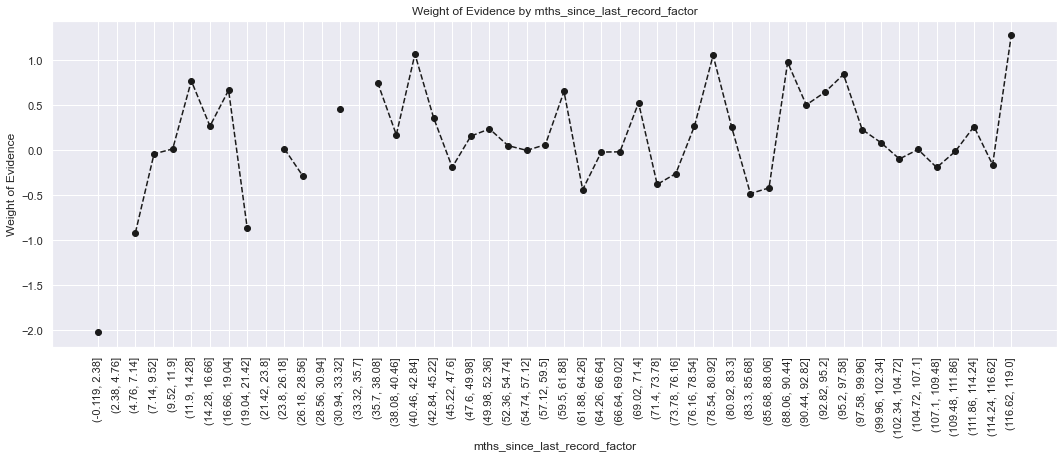

In [486]:
df_temp['mths_since_last_record_factor'] = df_temp['mths_since_last_record_factor'].astype(str)
plot_by_woe(df_temp,90)

In [487]:
df_inputs_prepr_final['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()),1,0)
df_inputs_prepr_final['mths_since_last_record:0-15'] = np.where((df_inputs_prepr['mths_since_last_record'] >=0) & (df_inputs_prepr['mths_since_last_delinq']<15),1,0)
df_inputs_prepr_final['mths_since_last_record:15-38'] = np.where((df_inputs_prepr['mths_since_last_record'] >=15) & (df_inputs_prepr['mths_since_last_delinq']<38),1,0)
df_inputs_prepr_final['mths_since_last_record:38-72'] = np.where((df_inputs_prepr['mths_since_last_record'] >=38) & (df_inputs_prepr['mths_since_last_delinq']<72),1,0)
df_inputs_prepr_final['mths_since_last_record:>=72'] = np.where((df_inputs_prepr['mths_since_last_record']>=72),1,0)

In [488]:
df_inputs_prepr_final.shape

(93257, 84)

We will now use SMOTE as a oversampling technique to handle the imbalance in our train data. SMOTE (Synthetic Minority Oversampling TEchnique) consists of creating new samples for the minority class, by picking a sample from that class and computing the k-nearest neighbors, then adding a new sample between the chosen sample and its neighbors.

In [489]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
#df_inputs_prepr_samp, loan_data_targets_train = smote.fit_sample(df_inputs_prepr_final, loan_data_targets_train)
#df_inputs_prepr_samp, loan_data_targets_validation = smote.fit_sample(df_inputs_prepr_final, loan_data_targets_validation)
df_inputs_prepr_samp, loan_data_targets_test = smote.fit_sample(df_inputs_prepr_final, loan_data_targets_test)


In [490]:
df_inputs_prepr_samp.shape

(183116, 84)

### Preprocessing the Test Data

In [491]:
# Creating a copy of df_inputs_prepr train
#loan_data_inputs_train = df_inputs_prepr_samp.copy()
#loan_data_inputs_validation = df_inputs_prepr_samp.copy()
loan_data_inputs_test = df_inputs_prepr_samp.copy()

In [492]:
# Exporting to .csv
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
#loan_data_inputs_validation.to_csv('loan_data_inputs_validation.csv')
#loan_data_targets_validation.to_csv('loan_data_targets_validation.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')
